# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import mutual_info_regression, RFE, SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, AdamW
import warnings
warnings.filterwarnings('ignore')

# from google.colab import drive
# drive.mount('/content/drive')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# EDA

In [2]:
df = pd.read_csv('./student_habits_performance.csv')
print(f"Data berhasil dimuat: {df.shape[0]} baris dan {df.shape[1]} kolom")

Data berhasil dimuat: 1000 baris dan 16 kolom


In [3]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Kolom': df.columns,
    'Missing Values': missing_values,
    'Persentase (%)': missing_percentage.round(2)
})

print("Missing Values per Kolom:")
print(missing_df)
print()

Missing Values per Kolom:
                                                       Kolom  Missing Values  \
student_id                                        student_id               0   
age                                                      age               0   
gender                                                gender               0   
study_hours_per_day                      study_hours_per_day               0   
social_media_hours                        social_media_hours               0   
netflix_hours                                  netflix_hours               0   
part_time_job                                  part_time_job               0   
attendance_percentage                  attendance_percentage               0   
sleep_hours                                      sleep_hours               0   
diet_quality                                    diet_quality               0   
exercise_frequency                        exercise_frequency               0   
parental_educa

In [4]:
total_missing = missing_values.sum()
print(f"Total Missing Values: {total_missing}")
print(f"Persentase Total Missing: {(total_missing/(df.shape[0] * df.shape[1])*100):.2f}%")
print()

Total Missing Values: 91
Persentase Total Missing: 0.57%



In [5]:
duplicates = df.duplicated().sum()
print(f"Jumlah Baris Duplikat: {duplicates}")
print()

Jumlah Baris Duplikat: 0



## Statistik Deskriptif

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Kolom Numerik ({len(numeric_cols)}): {numeric_cols}")
print(f"Kolom Kategorik ({len(categorical_cols)}): {categorical_cols}")
print()

Kolom Numerik (9): ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']
Kolom Kategorik (7): ['student_id', 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']



### Statistik Deskriptif Kolom Numerik

In [7]:
desc_stats = df[numeric_cols].describe()
print(desc_stats.round(2))
print()
print("-" * 50)
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    print(f"\n{col}:")
    print(f"  • Range: {df[col].min():.2f} - {df[col].max():.2f}")
    print(f"  • IQR: {iqr:.2f} (Q1: {q1:.2f}, Q3: {q3:.2f})")
    print(f"  • Skewness: {df[col].skew():.3f}")
    print(f"  • Kurtosis: {df[col].kurtosis():.3f}")


           age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.00              1000.00             1000.00        1000.00   
mean     20.50                 3.55                2.51           1.82   
std       2.31                 1.47                1.17           1.08   
min      17.00                 0.00                0.00           0.00   
25%      18.75                 2.60                1.70           1.00   
50%      20.00                 3.50                2.50           1.80   
75%      23.00                 4.50                3.30           2.52   
max      24.00                 8.30                7.20           5.40   

       attendance_percentage  sleep_hours  exercise_frequency  \
count                1000.00      1000.00             1000.00   
mean                   84.13         6.47                3.04   
std                     9.40         1.23                2.03   
min                    56.00         3.20                0.00   
25%     

### Statistik Deskriptif Kategorikal

In [8]:
for col in categorical_cols:
    print(f"\n {col.upper()}:")
    print("-" * 30)
    value_counts = df[col].value_counts()
    value_props = df[col].value_counts(normalize=True) * 100

    for value in value_counts.index:
        count = value_counts[value]
        percentage = value_props[value]
        print(f"  • {value}: {count} ({percentage:.1f}%)")

    print(f"  • Unique Values: {df[col].nunique()}")
    print(f"  • Most Frequent: {df[col].mode().iloc[0]}")


 STUDENT_ID:
------------------------------
  • S1000: 1 (0.1%)
  • S1671: 1 (0.1%)
  • S1658: 1 (0.1%)
  • S1659: 1 (0.1%)
  • S1660: 1 (0.1%)
  • S1661: 1 (0.1%)
  • S1662: 1 (0.1%)
  • S1663: 1 (0.1%)
  • S1664: 1 (0.1%)
  • S1665: 1 (0.1%)
  • S1666: 1 (0.1%)
  • S1667: 1 (0.1%)
  • S1668: 1 (0.1%)
  • S1669: 1 (0.1%)
  • S1670: 1 (0.1%)
  • S1672: 1 (0.1%)
  • S1687: 1 (0.1%)
  • S1673: 1 (0.1%)
  • S1674: 1 (0.1%)
  • S1675: 1 (0.1%)
  • S1676: 1 (0.1%)
  • S1677: 1 (0.1%)
  • S1678: 1 (0.1%)
  • S1679: 1 (0.1%)
  • S1680: 1 (0.1%)
  • S1681: 1 (0.1%)
  • S1682: 1 (0.1%)
  • S1683: 1 (0.1%)
  • S1684: 1 (0.1%)
  • S1685: 1 (0.1%)
  • S1657: 1 (0.1%)
  • S1656: 1 (0.1%)
  • S1655: 1 (0.1%)
  • S1654: 1 (0.1%)
  • S1627: 1 (0.1%)
  • S1628: 1 (0.1%)
  • S1629: 1 (0.1%)
  • S1630: 1 (0.1%)
  • S1631: 1 (0.1%)
  • S1632: 1 (0.1%)
  • S1633: 1 (0.1%)
  • S1634: 1 (0.1%)
  • S1635: 1 (0.1%)
  • S1636: 1 (0.1%)
  • S1637: 1 (0.1%)
  • S1638: 1 (0.1%)
  • S1639: 1 (0.1%)
  • S1640: 1 (0

## Visualisasi

### Data Numerik

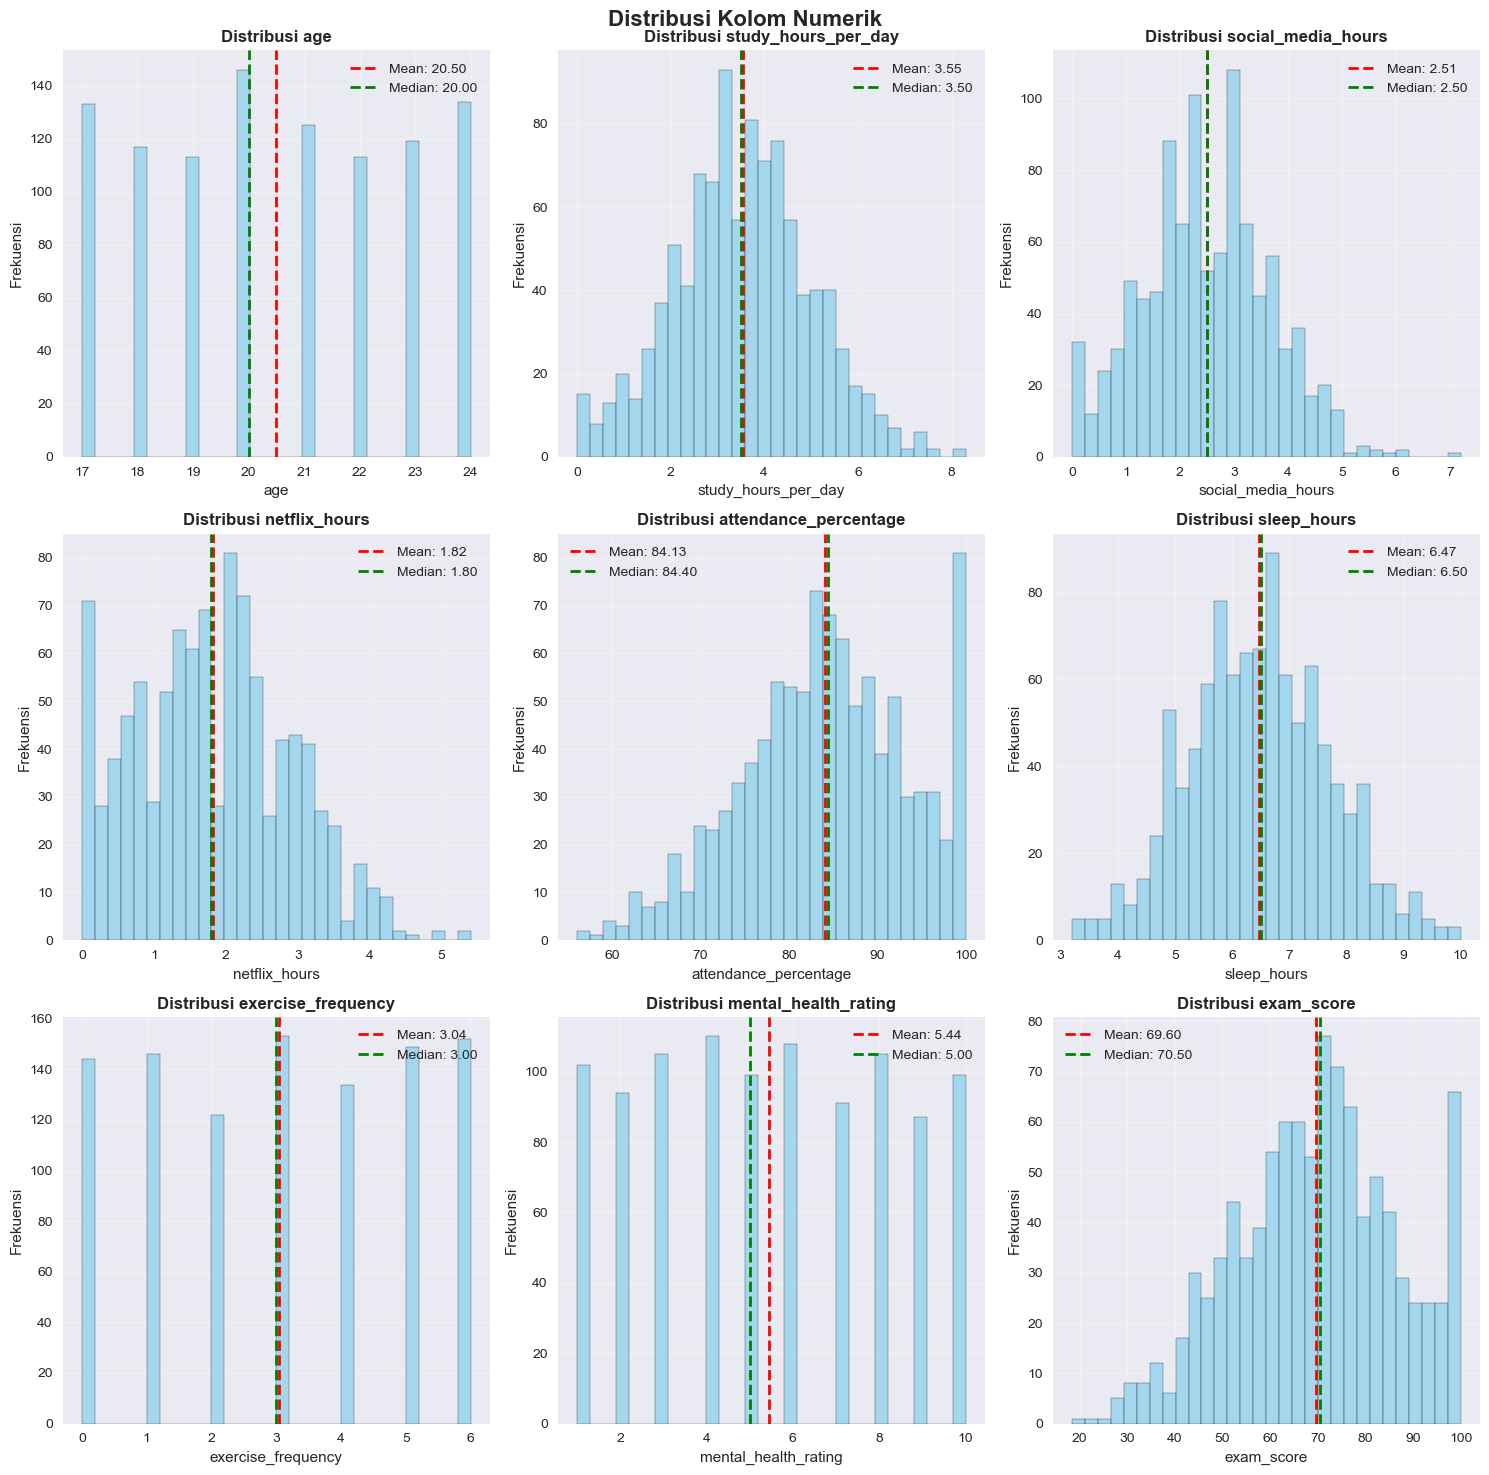

In [9]:
# Hapus kolom yang bukan untuk visualisasi (student_id tidak perlu divisualisasi)
numeric_cols_viz = [col for col in numeric_cols if col != 'student_id']

# Buat subplot untuk histogram
n_cols = 3
n_rows = (len(numeric_cols_viz) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.suptitle('Distribusi Kolom Numerik', fontsize=16, fontweight='bold')

# Flatten axes jika lebih dari 1 row
if n_rows > 1:
    axes = axes.flatten()
elif n_rows == 1 and n_cols > 1:
    axes = axes
else:
    axes = [axes]

for i, col in enumerate(numeric_cols_viz):
    if i < len(axes):
        axes[i].hist(df[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.2f}')
        axes[i].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[col].median():.2f}')
        axes[i].set_title(f'Distribusi {col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frekuensi')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

for i in range(len(numeric_cols_viz), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

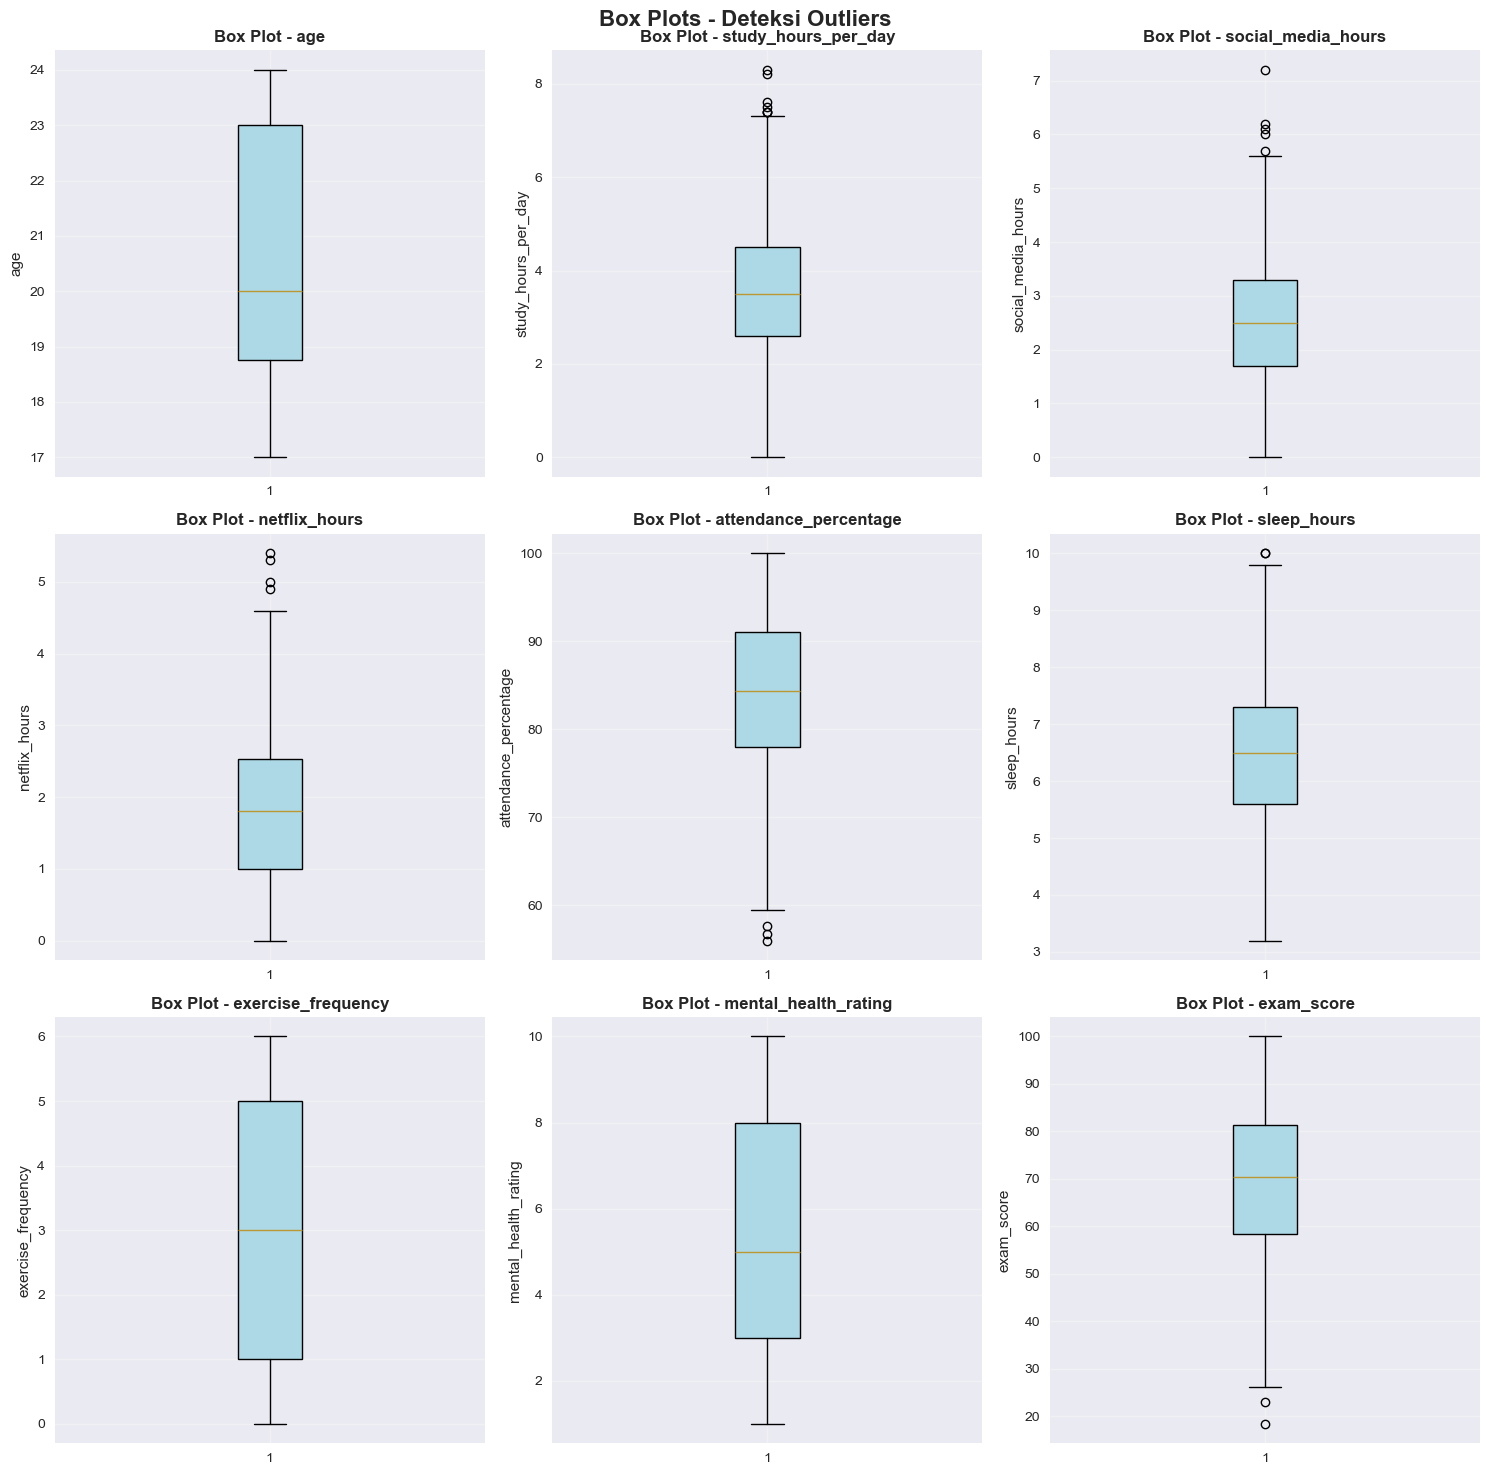

In [10]:
# Box plots untuk deteksi outliers
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
fig.suptitle('Box Plots - Deteksi Outliers', fontsize=16, fontweight='bold')

if n_rows > 1:
    axes = axes.flatten()
elif n_rows == 1 and n_cols > 1:
    axes = axes
else:
    axes = [axes]

for i, col in enumerate(numeric_cols_viz):
    if i < len(axes):
        box_plot = axes[i].boxplot(df[col], patch_artist=True)
        box_plot['boxes'][0].set_facecolor('lightblue')
        axes[i].set_title(f'Box Plot - {col}', fontweight='bold')
        axes[i].set_ylabel(col)
        axes[i].grid(True, alpha=0.3)

for i in range(len(numeric_cols_viz), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Data Kategorikal

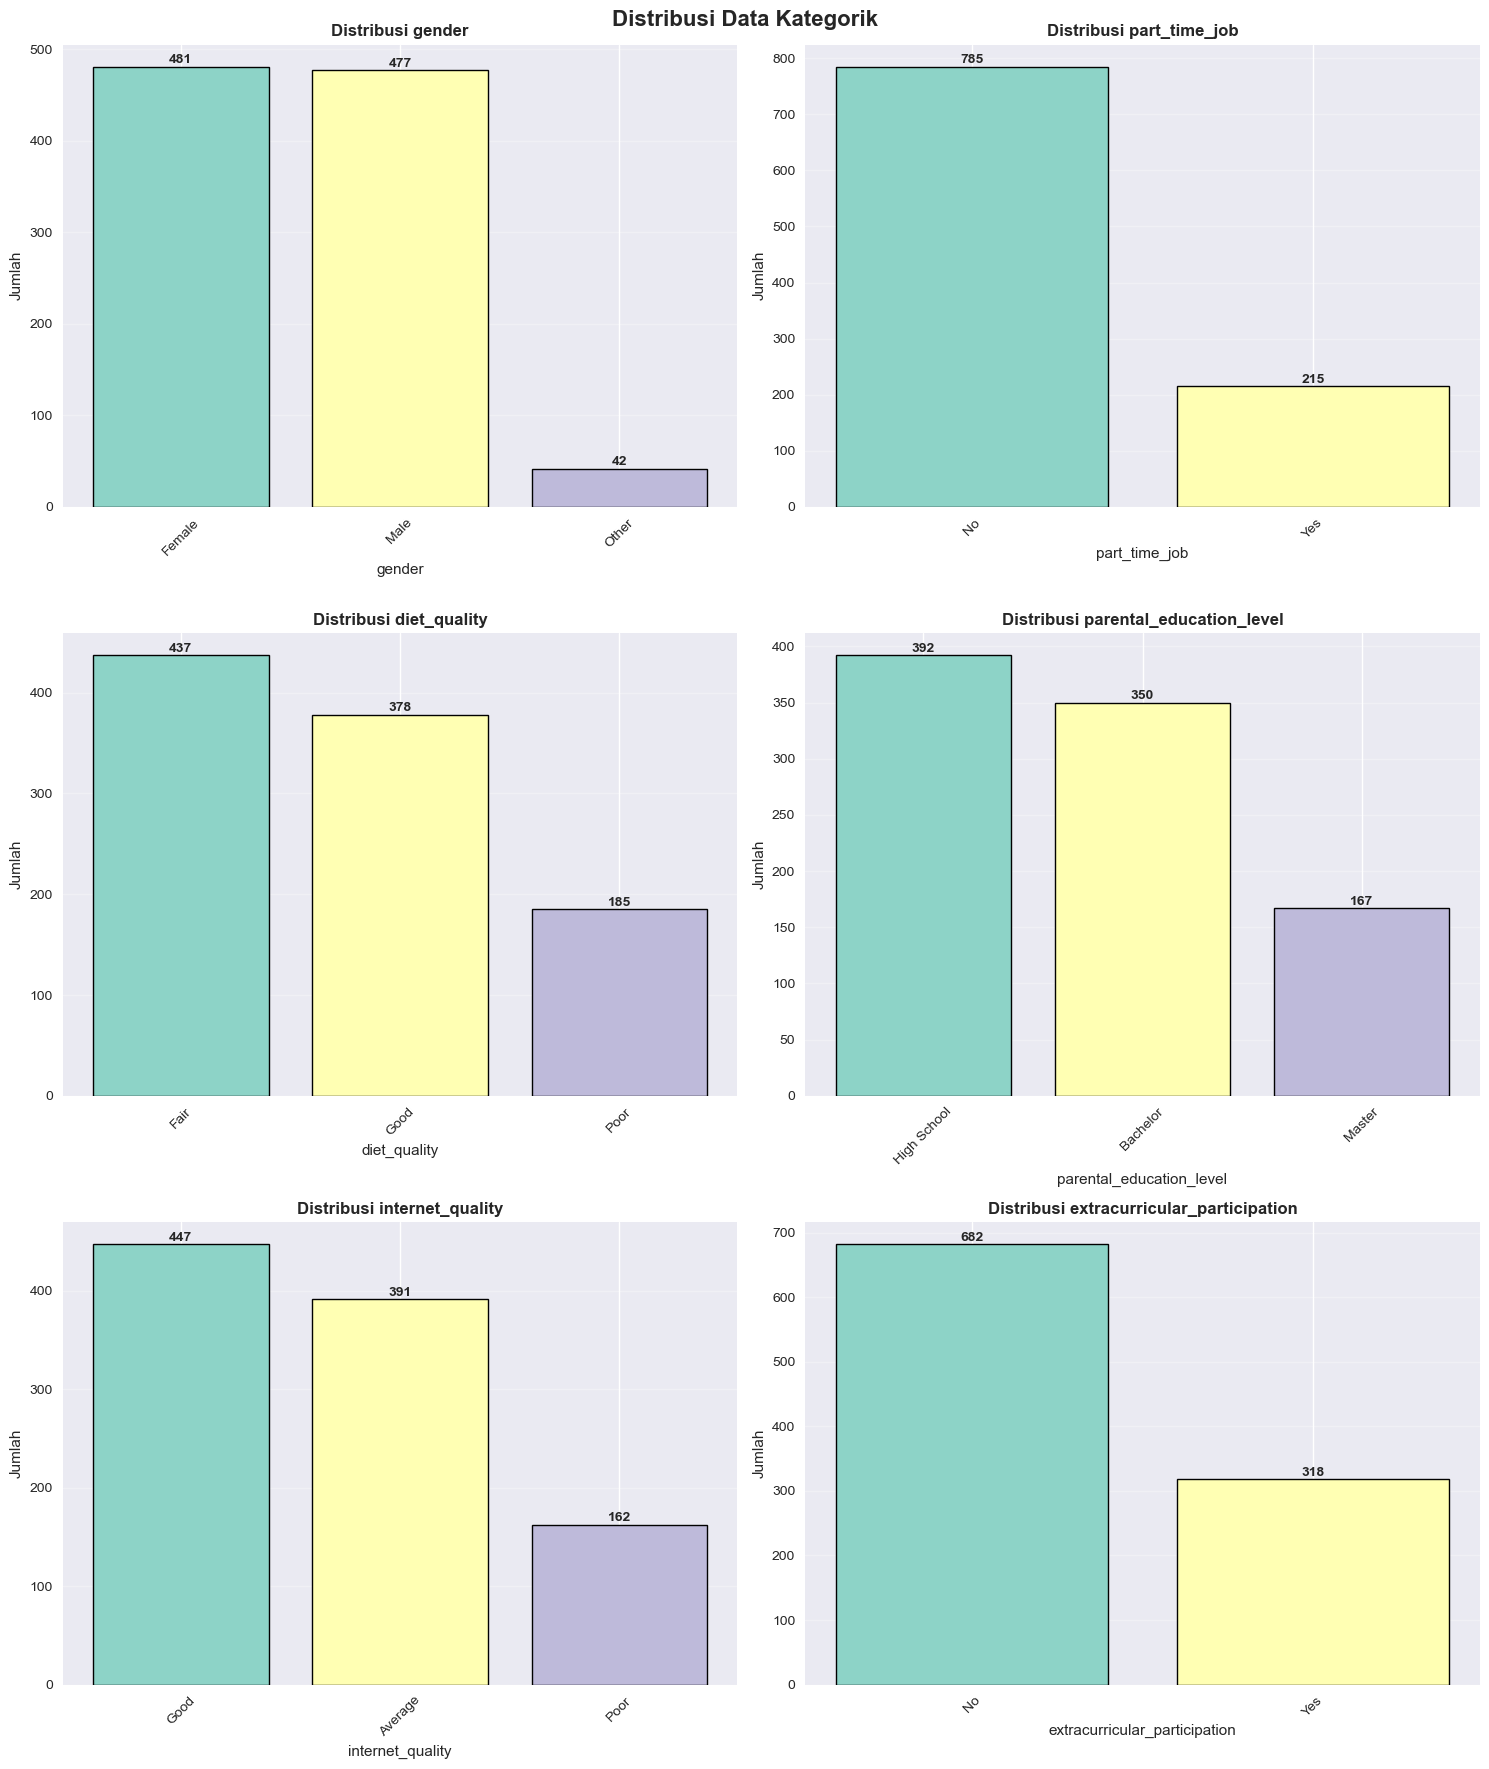

In [11]:
# Hapus student_id dari categorical columns
categorical_cols_viz = [col for col in categorical_cols if col != 'student_id']

# Hitung jumlah subplot yang dibutuhkan
n_cols = 2
n_rows = (len(categorical_cols_viz) + n_cols - 1) // n_cols

# Bar plots untuk setiap kolom kategorik
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
fig.suptitle('Distribusi Data Kategorik', fontsize=16, fontweight='bold')

if n_rows > 1:
    axes = axes.flatten()
elif n_rows == 1 and n_cols > 1:
    axes = axes
else:
    axes = [axes]

colors = plt.cm.Set3(np.linspace(0, 1, 12))

for i, col in enumerate(categorical_cols_viz):
    if i < len(axes):
        value_counts = df[col].value_counts()

        # Bar plot
        bars = axes[i].bar(value_counts.index, value_counts.values,
                          color=colors[:len(value_counts)],
                          edgecolor='black', linewidth=1)

        axes[i].set_title(f'Distribusi {col}', fontweight='bold', fontsize=12)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Jumlah')
        axes[i].tick_params(axis='x', rotation=45)

        for bar, value in zip(bars, value_counts.values):
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                        f'{value}', ha='center', va='bottom', fontweight='bold')

        axes[i].grid(True, alpha=0.3, axis='y')

for i in range(len(categorical_cols_viz), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

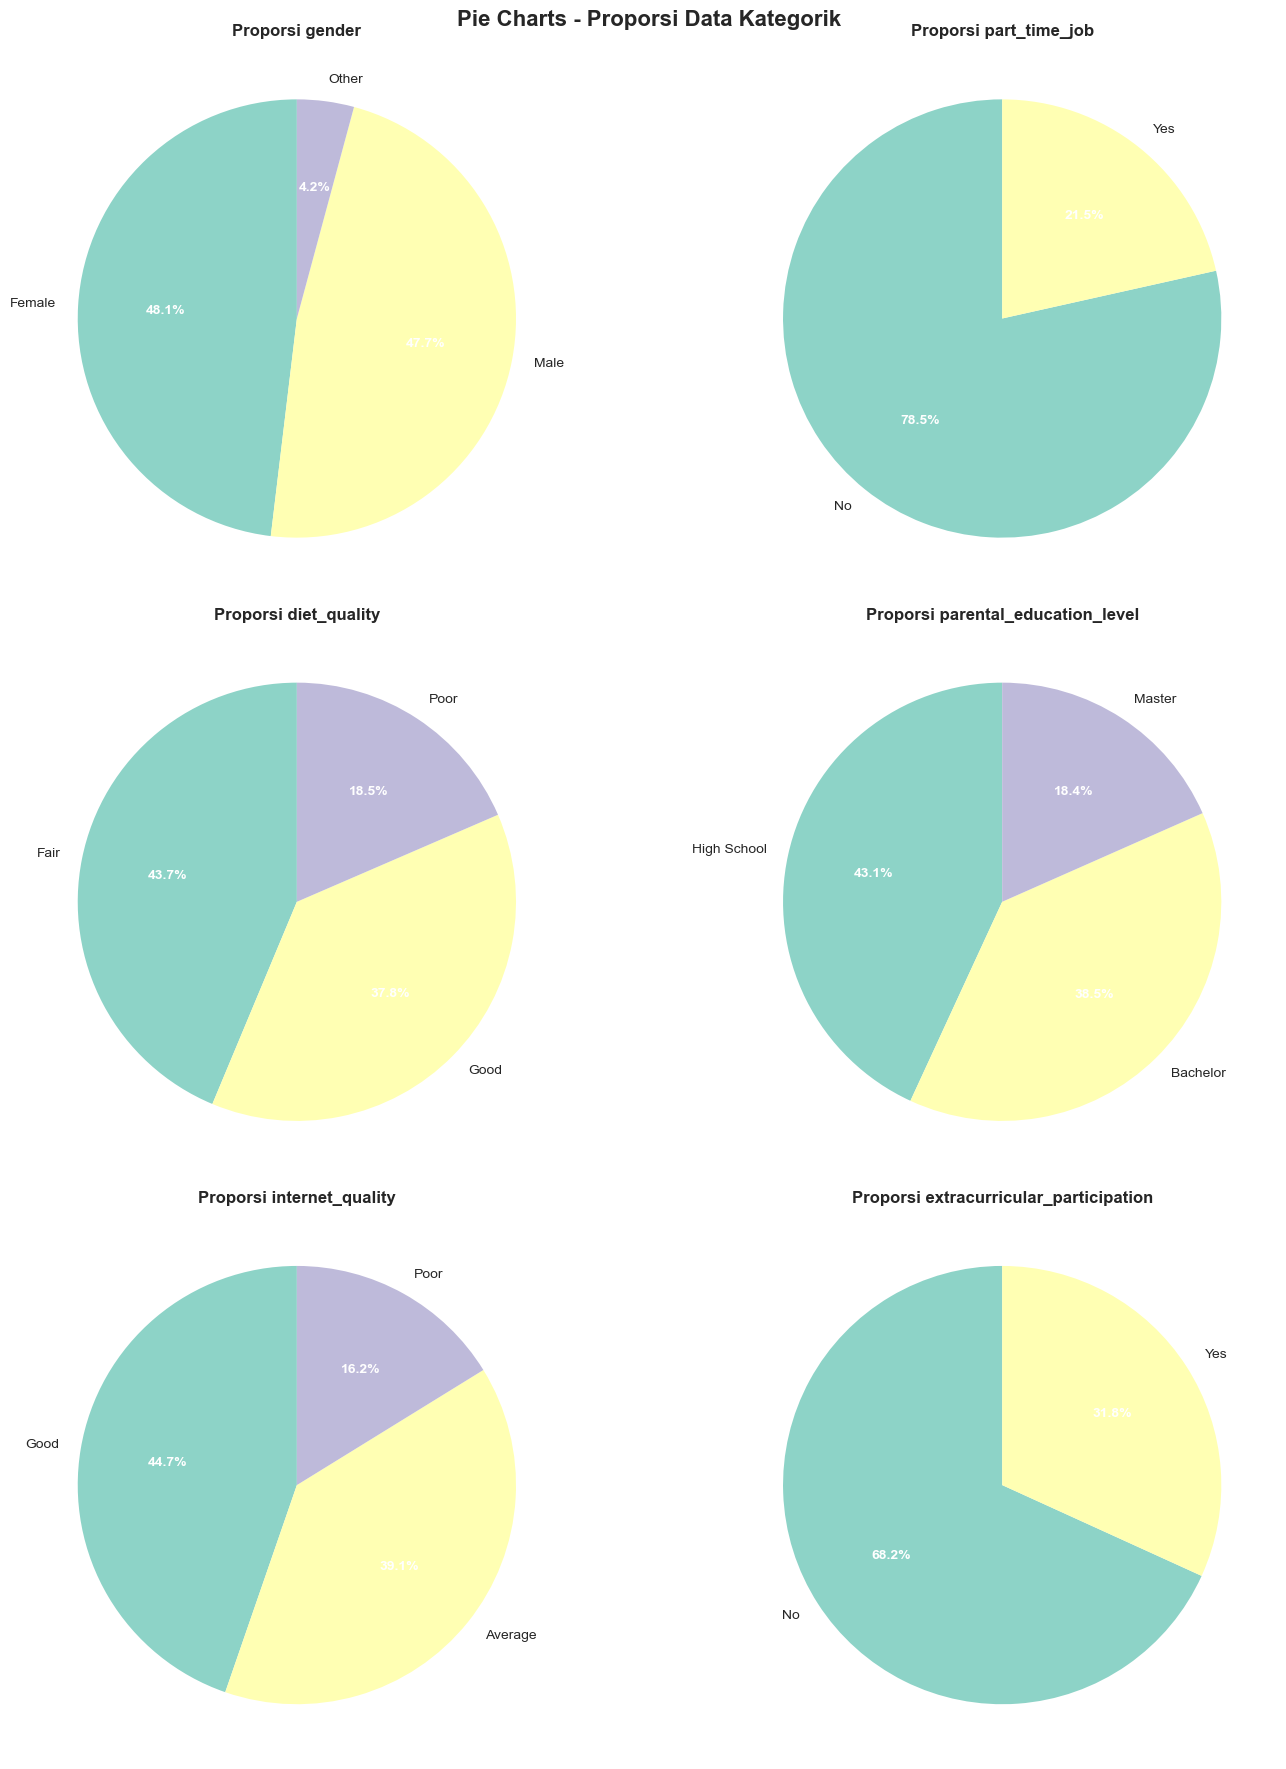

In [12]:
# Pie charts untuk variabel kategorik
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
fig.suptitle('Pie Charts - Proporsi Data Kategorik', fontsize=16, fontweight='bold')

if n_rows > 1:
    axes = axes.flatten()
elif n_rows == 1 and n_cols > 1:
    axes = axes
else:
    axes = [axes]

for i, col in enumerate(categorical_cols_viz):
    if i < len(axes):
        value_counts = df[col].value_counts()

        # Pie chart
        wedges, texts, autotexts = axes[i].pie(value_counts.values,
                                              labels=value_counts.index,
                                              autopct='%1.1f%%',
                                              colors=colors[:len(value_counts)],
                                              startangle=90)

        axes[i].set_title(f'Proporsi {col}', fontweight='bold', fontsize=12)

        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')

for i in range(len(categorical_cols_viz), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### Detect outlier

In [13]:
def detect_outliers_zscore(df, column, threshold=3):
    """Deteksi outliers menggunakan Z-score"""
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]

    return outliers, z_scores

In [14]:
def detect_outliers_iqr(df, column):
    """Deteksi outliers menggunakan metode IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    return outliers, lower_bound, upper_bound


 AGE:
------------------------------
  IQR Method:
    Lower Bound: 12.38
    Upper Bound: 29.38
    Outliers: 0 (0.0%)
  Z-Score Method (threshold=3):
    Outliers: 0 (0.0%)

 STUDY_HOURS_PER_DAY:
------------------------------
  IQR Method:
    Lower Bound: -0.25
    Upper Bound: 7.35
    Outliers: 7 (0.7%)
  Z-Score Method (threshold=3):
    Outliers: 2 (0.2%)

 SOCIAL_MEDIA_HOURS:
------------------------------
  IQR Method:
    Lower Bound: -0.70
    Upper Bound: 5.70
    Outliers: 5 (0.5%)
  Z-Score Method (threshold=3):
    Outliers: 3 (0.3%)

 NETFLIX_HOURS:
------------------------------
  IQR Method:
    Lower Bound: -1.29
    Upper Bound: 4.81
    Outliers: 4 (0.4%)
  Z-Score Method (threshold=3):
    Outliers: 2 (0.2%)

 ATTENDANCE_PERCENTAGE:
------------------------------
  IQR Method:
    Lower Bound: 58.46
    Upper Bound: 110.56
    Outliers: 3 (0.3%)
  Z-Score Method (threshold=3):
    Outliers: 0 (0.0%)

 SLEEP_HOURS:
------------------------------
  IQR Method:
   

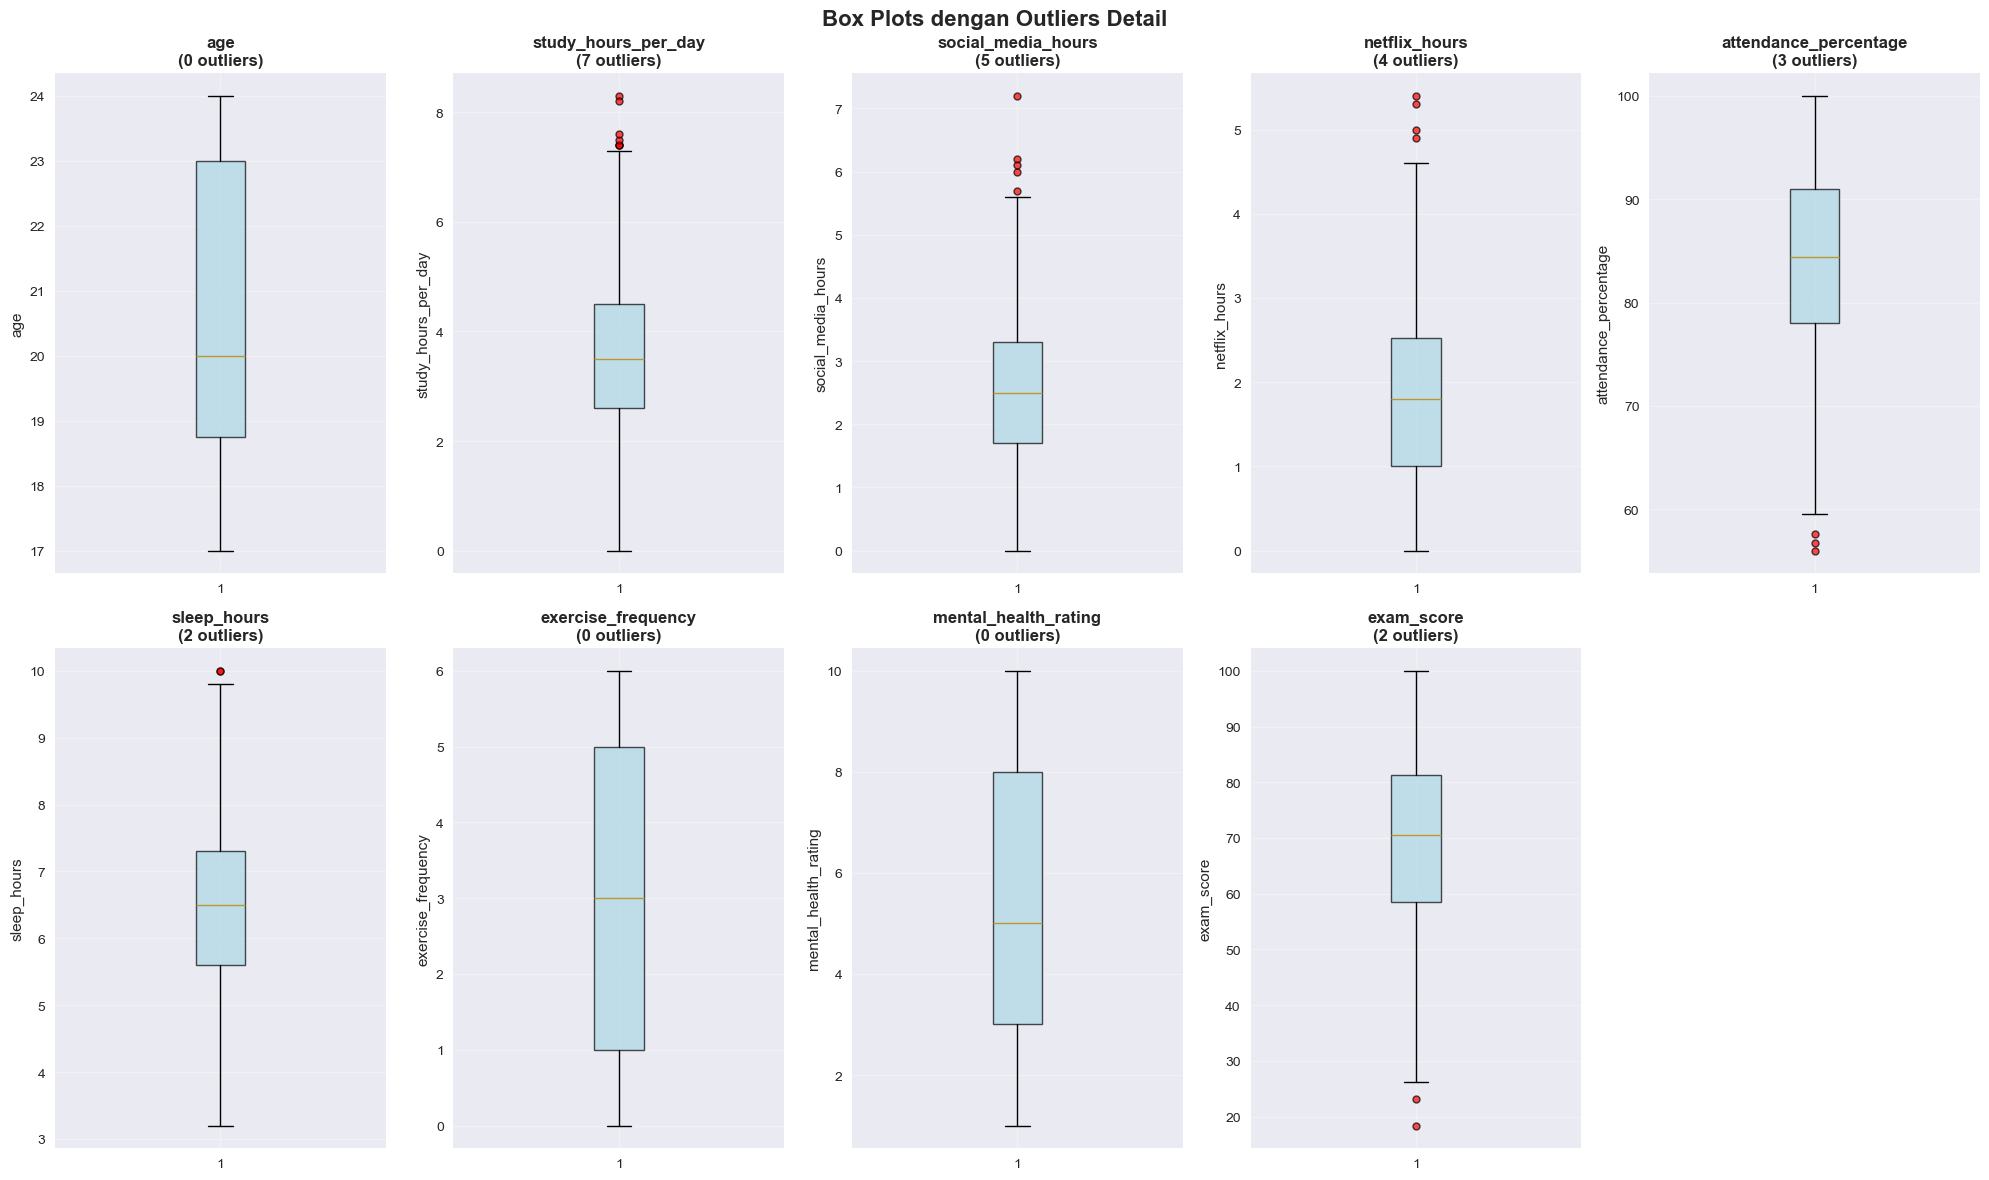

In [15]:
outlier_summary = {}
numeric_for_corr = [col for col in numeric_cols if col not in ['student_id']]

for col in numeric_for_corr:
    outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    outliers_zscore, z_scores = detect_outliers_zscore(df, col)

    print(f"\n {col.upper()}:")
    print("-" * 30)
    print(f"  IQR Method:")
    print(f"    Lower Bound: {lower_bound:.2f}")
    print(f"    Upper Bound: {upper_bound:.2f}")
    print(f"    Outliers: {len(outliers_iqr)} ({len(outliers_iqr)/len(df)*100:.1f}%)")

    print(f"  Z-Score Method (threshold=3):")
    print(f"    Outliers: {len(outliers_zscore)} ({len(outliers_zscore)/len(df)*100:.1f}%)")

    outlier_summary[col] = {
        'iqr_outliers': len(outliers_iqr),
        'zscore_outliers': len(outliers_zscore),
        'iqr_percentage': len(outliers_iqr)/len(df)*100,
        'zscore_percentage': len(outliers_zscore)/len(df)*100
    }

# Visualisasi outliers
fig, axes = plt.subplots(2, len(numeric_for_corr)//2 + len(numeric_for_corr)%2, figsize=(20, 12))
fig.suptitle('Box Plots dengan Outliers Detail', fontsize=16, fontweight='bold')

axes = axes.flatten() if len(numeric_for_corr) > 2 else [axes] if len(numeric_for_corr) == 1 else axes

for i, col in enumerate(numeric_for_corr):
    if i < len(axes):
        # Box plot dengan outliers
        bp = axes[i].boxplot(df[col], patch_artist=True,
                            boxprops=dict(facecolor='lightblue', alpha=0.7),
                            flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.7))

        axes[i].set_title(f'{col}\n({outlier_summary[col]["iqr_outliers"]} outliers)', fontweight='bold')
        axes[i].set_ylabel(col)
        axes[i].grid(True, alpha=0.3)

# Hapus subplot yang tidak digunakan
for i in range(len(numeric_for_corr), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [16]:
# Identifikasi baris dengan outliers terbanyak

outlier_counts = pd.Series(0, index=df.index)

for col in numeric_for_corr:
    outliers_iqr, _, _ = detect_outliers_iqr(df, col)
    outlier_counts[outliers_iqr.index] += 1

# Tampilkan baris dengan outliers terbanyak
top_outlier_rows = outlier_counts.sort_values(ascending=False).head(10)
print("Top 10 baris dengan outliers terbanyak:")
for idx, count in top_outlier_rows.items():
    if count > 0:
        print(f"  Baris {idx} (Student {df.loc[idx, 'student_id']}): {count} outliers")

Top 10 baris dengan outliers terbanyak:
  Baris 887 (Student S1887): 1 outliers
  Baris 802 (Student S1802): 1 outliers
  Baris 955 (Student S1955): 1 outliers
  Baris 346 (Student S1346): 1 outliers
  Baris 293 (Student S1293): 1 outliers
  Baris 73 (Student S1073): 1 outliers
  Baris 774 (Student S1774): 1 outliers
  Baris 455 (Student S1455): 1 outliers
  Baris 971 (Student S1971): 1 outliers
  Baris 651 (Student S1651): 1 outliers


In [17]:
total_outliers = sum([outlier_summary[col]['iqr_outliers'] for col in outlier_summary])
print(f"• Total outliers terdeteksi: {total_outliers}")
print(f"• Persentase data dengan outliers: {len(top_outlier_rows[top_outlier_rows > 0])/len(df)*100:.1f}%")

if len(top_outlier_rows[top_outlier_rows > 0]) > len(df) * 0.05:
    print("• Banyak outliers terdeteksi (>5%)")
else:
    print("• Jumlah outliers dalam batas wajar (<5%)")

• Total outliers terdeteksi: 23
• Persentase data dengan outliers: 1.0%
• Jumlah outliers dalam batas wajar (<5%)


# Modeling

## Data Preparation

### Handle Outlier

In [18]:
df_clean = df.copy()

In [19]:
# Hitung outliers menggunakan IQR method
outlier_indices = set()
for col in numeric_for_corr:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col_outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)].index
    outlier_indices.update(col_outliers)

print(f"Total baris dengan outliers: {len(outlier_indices)} ({len(outlier_indices)/len(df_clean)*100:.1f}%)")

df_clean.drop(outlier_indices)
print(f"Data setelah hapus outliers: {df_clean.shape[0]} baris x {df_clean.shape[1]} kolom")

Total baris dengan outliers: 23 (2.3%)
Data setelah hapus outliers: 1000 baris x 16 kolom


### Handle missing value

In [20]:
missing_before = df_clean.isnull().sum().sum()
print(f"Missing values sebelum cleaning: {missing_before}")

if missing_before == 0:
    print("Tidak ada missing values yang perlu ditangani")
else:
    mode_value = df_clean['parental_education_level'].mode()[0]
    df_clean['parental_education_level'].fillna(mode_value, inplace=True)

    print(f"Mode value: {mode_value}")
    print(f"\nDistribusi setelah mode imputation:")
    mode_counts = df_clean['parental_education_level'].value_counts()
    print(mode_counts)

Missing values sebelum cleaning: 91
Mode value: High School

Distribusi setelah mode imputation:
parental_education_level
High School    483
Bachelor       350
Master         167
Name: count, dtype: int64


### Encoding Variabel

In [21]:
# Label Encoding untuk variabel kategorik
le_dict = {}

for col in categorical_cols:
    if col != 'student_id':  # Skip student_id
        le = LabelEncoder()
        df_clean[col + '_encoded'] = le.fit_transform(df_clean[col])
        le_dict[col] = le

        print(f"{col} → {col}_encoded")
        # Tampilkan mapping
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"   Mapping: {mapping}")

gender → gender_encoded
   Mapping: {'Female': 0, 'Male': 1, 'Other': 2}
part_time_job → part_time_job_encoded
   Mapping: {'No': 0, 'Yes': 1}
diet_quality → diet_quality_encoded
   Mapping: {'Fair': 0, 'Good': 1, 'Poor': 2}
parental_education_level → parental_education_level_encoded
   Mapping: {'Bachelor': 0, 'High School': 1, 'Master': 2}
internet_quality → internet_quality_encoded
   Mapping: {'Average': 0, 'Good': 1, 'Poor': 2}
extracurricular_participation → extracurricular_participation_encoded
   Mapping: {'No': 0, 'Yes': 1}


### Normalisasi Variabel

In [22]:
# Standardisasi/Normalisasi Variabel Numerik
# Standardisasi (Z-score normalization)
scaler_std = StandardScaler()
numeric_cols_for_scaling = [col for col in numeric_for_corr if col != 'exam_score']

df_clean[numeric_cols_for_scaling] = scaler_std.fit_transform(df_clean[numeric_cols_for_scaling])

print("Standardisasi (Z-score) completed untuk kolom numerik")

Standardisasi (Z-score) completed untuk kolom numerik


### Feature Engineering

In [23]:
df_clean['total_screen_time'] = df_clean['social_media_hours'] + df_clean['netflix_hours']
df_clean['study_efficiency'] = df_clean['exam_score'] / (df_clean['study_hours_per_day'] + 0.1)  # +0.1 untuk avoid division by zero
df_clean['sleep_quality_score'] = df_clean['sleep_hours'] * df_clean['mental_health_rating']
df_clean['academic_lifestyle'] = df_clean['study_hours_per_day'] - df_clean['total_screen_time']

df_clean['age_group'] = pd.cut(df_clean['age'],
                                   bins=[16, 19, 21, 25],
                                   labels=['Young', 'Mid', 'Mature'])

df_clean['performance_level'] = pd.cut(df_clean['exam_score'],
                                           bins=[0, 50, 75, 100],
                                           labels=['Low', 'Medium', 'High'])

print("   • total_screen_time = social_media_hours + netflix_hours")
print("   • study_efficiency = exam_score / (study_hours_per_day + 0.1)")
print("   • sleep_quality_score = sleep_hours * mental_health_rating")
print("   • academic_lifestyle = study_hours_per_day - total_screen_time")
print("   • age_group = binning dari age")
print("   • performance_level = binning dari exam_score")

   • total_screen_time = social_media_hours + netflix_hours
   • study_efficiency = exam_score / (study_hours_per_day + 0.1)
   • sleep_quality_score = sleep_hours * mental_health_rating
   • academic_lifestyle = study_hours_per_day - total_screen_time
   • age_group = binning dari age
   • performance_level = binning dari exam_score


### Save Data Clean

In [24]:
output_path = './data_clean.csv'

In [25]:
df_clean.to_csv(output_path, index=False)

### Feature Selection

In [26]:
df = pd.read_csv('./data_clean.csv')

In [27]:
ALL_FEATURES = [
    'age', 'gender_encoded', 'part_time_job_encoded', 'attendance_percentage',
    'diet_quality_encoded', 'exercise_frequency', 'parental_education_level_encoded',
    'internet_quality_encoded', 'mental_health_rating', 'extracurricular_participation_encoded',
    'exam_score', 'total_screen_time', 'study_efficiency', 'sleep_quality_score',
    'academic_lifestyle'
]

TARGET_VARS = ['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'netflix_hours']

# Clean data
X_clean = df[ALL_FEATURES].copy()
y_clean = df[TARGET_VARS].copy()

In [28]:
class FeatureSelector:
    """
    Feature selection menggunakan ensemble dari beberapa metode
    """

    def __init__(self, n_features=5):
        self.n_features = n_features
        self.method_scores = {}
        self.ensemble_scores = {}

    def mutual_information_selection(self, X, y):
        """
        Mutual Information
        """
        print("Computing Mutual Information score...")

        mi_scores = {}
        for target in y.columns:
            mi = mutual_info_regression(X, y[target], random_state=42)
            for i, feature in enumerate(X.columns):
                if feature not in mi_scores:
                    mi_scores[feature] = []
                mi_scores[feature].append(mi[i])

        avg_mi_scores = {feature: np.mean(scores) for feature, scores in mi_scores.items()}
        return avg_mi_scores

    def recursive_feature_elimination(self, X, y):
        """
        RFE with Random Forest
        """
        print(" Recursive Feature Elimination...")

        rfe_scores = {}
        rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

        for target in y.columns:
            rfe = RFE(estimator=rf, n_features_to_select=self.n_features, step=1)
            rfe.fit(X, y[target])

            for i, feature in enumerate(X.columns):
                if feature not in rfe_scores:
                    rfe_scores[feature] = []
                score = (len(X.columns) - rfe.ranking_[i] + 1) / len(X.columns)
                rfe_scores[feature].append(score)

        avg_rfe_scores = {feature: np.mean(scores) for feature, scores in rfe_scores.items()}
        return avg_rfe_scores

    def statistical_f_test(self, X, y):
        """
        F-test untuk statistical significance
        """
        print("F-test statistics...")

        f_scores = {}
        for target in y.columns:
            f_stat, _ = f_regression(X, y[target])
            for i, feature in enumerate(X.columns):
                if feature not in f_scores:
                    f_scores[feature] = []
                f_scores[feature].append(f_stat[i])

        avg_f_scores = {feature: np.mean(scores) for feature, scores in f_scores.items()}
        return avg_f_scores

    def correlation_analysis(self, X, y):
        """
        Correlation analysis
        """
        print("Computing correlation scores...")

        corr_scores = {}
        for feature in X.columns:
            correlations = []
            for target in y.columns:
                # absolute correlation
                corr = abs(X[feature].corr(y[target]))
                correlations.append(corr)
            corr_scores[feature] = np.mean(correlations)

        return corr_scores

    def random_forest_importance(self, X, y):
        """
        Random Forest
        """
        print("Random Forest")

        rf_scores = {}
        for target in y.columns:
            rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
            rf.fit(X, y[target])

            for i, feature in enumerate(X.columns):
                if feature not in rf_scores:
                    rf_scores[feature] = []
                rf_scores[feature].append(rf.feature_importances_[i])

        avg_rf_scores = {feature: np.mean(scores) for feature, scores in rf_scores.items()}
        return avg_rf_scores

    def variance_threshold_scoring(self, X):
        """
        Variance
        """
        print(" Computing variance scores...")

        variance_scores = {}
        for feature in X.columns:
            variance_scores[feature] = X[feature].var()

        return variance_scores

    def ensemble_feature_selection(self, X, y):
        """
        Ensemble method
        """
        print("\nENSEMBLE FEATURE SELECTION")
        print("="*50)

        methods = {
            'mutual_info': self.mutual_information_selection(X, y),
            'rfe': self.recursive_feature_elimination(X, y),
            'f_test': self.statistical_f_test(X, y),
            'correlation': self.correlation_analysis(X, y),
            'random_forest': self.random_forest_importance(X, y),
            'variance': self.variance_threshold_scoring(X)
        }

        #
        self.method_scores = methods

        # Normalize
        normalized_methods = {}
        for method_name, scores in methods.items():
            max_score = max(scores.values())
            min_score = min(scores.values())

            if max_score > min_score:
                normalized_methods[method_name] = {
                    feature: (score - min_score) / (max_score - min_score)
                    for feature, score in scores.items()
                }
            else:

                normalized_methods[method_name] = {feature: 0.5 for feature in scores.keys()}

        # Ensemble weights
        ensemble_weights = {
            'correlation': 0.20,
            'mutual_info': 0.25,
            'random_forest': 0.25,
            'rfe': 0.20,
            'f_test': 0.05,
            'variance': 0.05
        }

        print("Ensemble weights:")
        for method, weight in ensemble_weights.items():
            print(f"  {method}: {weight:.2f}")

        # Calculate ensemble scores
        ensemble_scores = {}
        for feature in X.columns:
            score = sum(
                ensemble_weights[method] * normalized_methods[method][feature]
                for method in ensemble_weights.keys()
            )
            ensemble_scores[feature] = score

        self.ensemble_scores = ensemble_scores
        return ensemble_scores

    def get_top_features(self, ensemble_scores):
        """
        Get top N features
        """
        sorted_features = sorted(ensemble_scores.items(), key=lambda x: x[1], reverse=True)

        top_features = [feature for feature, _ in sorted_features[:self.n_features]]

        return top_features, sorted_features

    def analyze_feature_redundancy(self, X, top_features):
        """
        Analyze redundancy among selected features
        """

        # Correlation matrix
        corr_matrix = X[top_features].corr()

        print("inter corelation feature:")
        for i in range(len(top_features)):
            for j in range(i+1, len(top_features)):
                corr = abs(corr_matrix.iloc[i, j])
                status = " HIGH" if corr > 0.7 else " MODERATE" if corr > 0.5 else " LOW"
                print(f"  {top_features[i]} vs {top_features[j]}: {corr:.3f} {status}")

        return corr_matrix


selector = FeatureSelector(n_features=5)

ensemble_scores = selector.ensemble_feature_selection(X_clean, y_clean)

top_5_features, all_rankings = selector.get_top_features(ensemble_scores)


ENSEMBLE FEATURE SELECTION
Computing Mutual Information score...
 Recursive Feature Elimination...
F-test statistics...
Computing correlation scores...
Random Forest
 Computing variance scores...
Ensemble weights:
  correlation: 0.20
  mutual_info: 0.25
  random_forest: 0.25
  rfe: 0.20
  f_test: 0.05
  variance: 0.05


In [29]:
print(f"\nTOP 5 FEATURES:")
print("="*55)
for i, (feature, score) in enumerate(all_rankings[:5], 1):
    print(f"{i}. {feature}: {score:.4f}")

print(f"\n Detail Feature Selection:")
print("="*40)
for i, feature in enumerate(top_5_features, 1):
    print(f"\n{i}. {feature.upper()}:")
    print(f"    Ensemble Score: {selector.ensemble_scores[feature]:.4f}")
    print(f"    Correlation:    {selector.method_scores['correlation'][feature]:.4f}")
    print(f"    Mutual Info:    {selector.method_scores['mutual_info'][feature]:.4f}")
    print(f"    Random Forest:  {selector.method_scores['random_forest'][feature]:.4f}")
    print(f"    RFE Score:      {selector.method_scores['rfe'][feature]:.4f}")
    print(f"    F-test:         {selector.method_scores['f_test'][feature]:.4f}")
    print(f"    Variance:       {selector.method_scores['variance'][feature]:.4f}")


TOP 5 FEATURES:
1. study_efficiency: 0.7512
2. total_screen_time: 0.7506
3. sleep_quality_score: 0.5175
4. academic_lifestyle: 0.5009
5. exam_score: 0.4799

 Detail Feature Selection:

1. STUDY_EFFICIENCY:
    Ensemble Score: 0.7512
    Correlation:    0.0307
    Mutual Info:    0.6171
    Random Forest:  0.2811
    RFE Score:      1.0000
    F-test:         1.3626
    Variance:       19849939.2689

2. TOTAL_SCREEN_TIME:
    Ensemble Score: 0.7506
    Correlation:    0.3605
    Mutual Info:    0.2404
    Random Forest:  0.2935
    RFE Score:      0.9833
    F-test:         510.6381
    Variance:       2.0250

3. SLEEP_QUALITY_SCORE:
    Ensemble Score: 0.5175
    Correlation:    0.0233
    Mutual Info:    0.4664
    Random Forest:  0.1615
    RFE Score:      0.9500
    F-test:         0.6066
    Variance:       0.9698

4. ACADEMIC_LIFESTYLE:
    Ensemble Score: 0.5009
    Correlation:    0.4427
    Mutual Info:    0.1665
    Random Forest:  0.0333
    RFE Score:      0.9167
    F-test

inter corelation feature:
  study_efficiency vs total_screen_time: 0.062  LOW
  study_efficiency vs sleep_quality_score: 0.071  LOW
  study_efficiency vs academic_lifestyle: 0.034  LOW
  study_efficiency vs exam_score: 0.017  LOW
  total_screen_time vs sleep_quality_score: 0.041  LOW
  total_screen_time vs academic_lifestyle: 0.819  HIGH
  total_screen_time vs exam_score: 0.238  LOW
  sleep_quality_score vs academic_lifestyle: 0.041  LOW
  sleep_quality_score vs exam_score: 0.024  LOW
  academic_lifestyle vs exam_score: 0.667  MODERATE


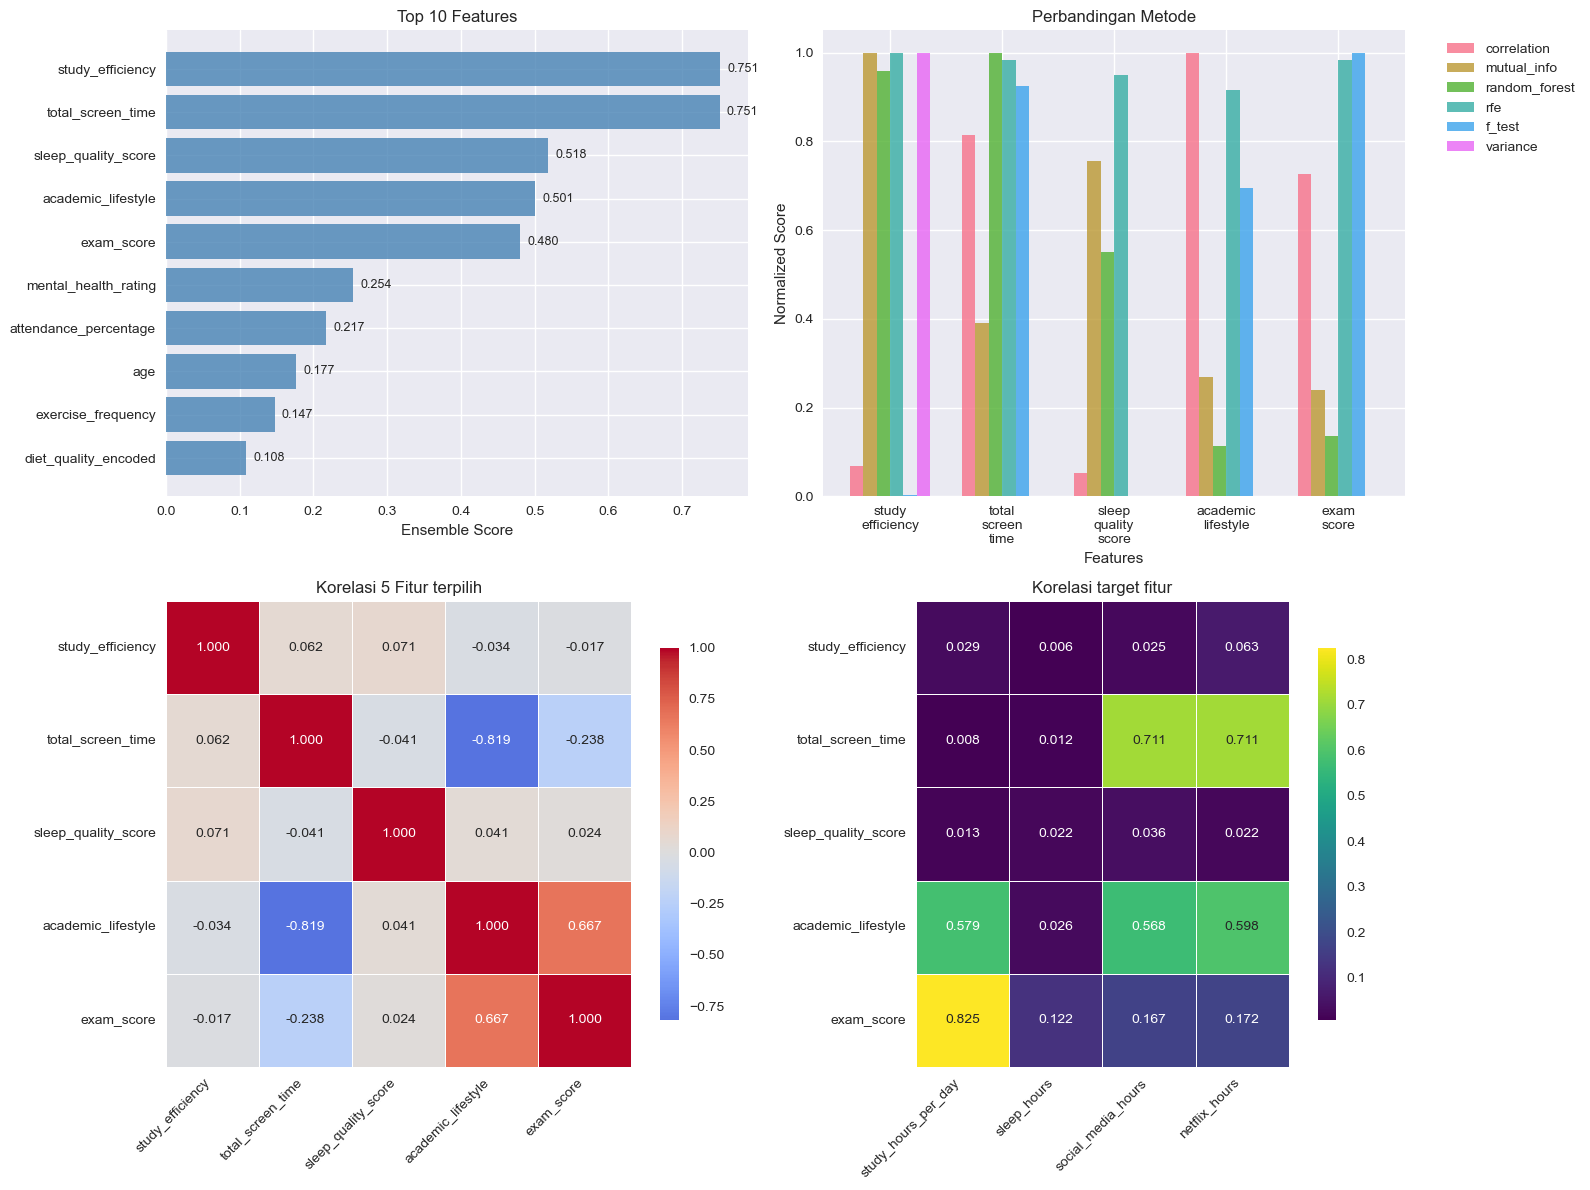

In [30]:
corr_matrix = selector.analyze_feature_redundancy(X_clean, top_5_features)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Ensemble
features_plot = [f for f, _ in all_rankings[:10]]
scores_plot = [s for _, s in all_rankings[:10]]
bars = ax1.barh(range(len(features_plot)), scores_plot, color='steelblue', alpha=0.8)
ax1.set_yticks(range(len(features_plot)))
ax1.set_yticklabels(features_plot)
ax1.set_xlabel('Ensemble Score')
ax1.set_title('Top 10 Features')
ax1.invert_yaxis()

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', ha='left', va='center', fontsize=9)

# Plot 2: Perbadningan metode
methods = ['correlation', 'mutual_info', 'random_forest', 'rfe', 'f_test', 'variance']
x = np.arange(len(top_5_features))
width = 0.12

for i, method in enumerate(methods):
    scores = [selector.method_scores[method][feature] for feature in top_5_features]
    max_score = max(selector.method_scores[method].values())
    normalized_scores = [s/max_score if max_score > 0 else 0 for s in scores]
    ax2.bar(x + i*width, normalized_scores, width, label=method, alpha=0.8)

ax2.set_xlabel('Features')
ax2.set_ylabel('Normalized Score')
ax2.set_title('Perbandingan Metode')
ax2.set_xticks(x + width*2.5)
ax2.set_xticklabels([f.replace('_', '\n') for f in top_5_features], rotation=0, ha='center')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 3: Feature correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.3f', ax=ax3)
ax3.set_title('Korelasi 5 Fitur terpilih')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

feature_target_corr = pd.DataFrame()
for target in TARGET_VARS:
    correlations = [abs(X_clean[feature].corr(y_clean[target])) for feature in top_5_features]
    feature_target_corr[target] = correlations

feature_target_corr.index = top_5_features
sns.heatmap(feature_target_corr, annot=True, cmap='viridis',
            square=True, linewidths=0.5, cbar_kws={"shrink": .8}, fmt='.3f', ax=ax4)
ax4.set_title('Korelasi target fitur')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [31]:
fiturfix = top_5_features
X_selected = X_clean[fiturfix].copy()

## Train Model

### Processor Model

In [32]:
class Processor:
    """
    processor model
    """

    def __init__(self):
        self.scaler = StandardScaler()
        self.feature_stats = {}
        self.correlation_matrix = None

    def analyze_selected_features(self, X):
        """
        analysis selected feature
        """
        print("ANALYSIS SELECTED FEATURES")
        print("="*45)

        # Feature statistics
        print("\nFeature Statistics:")
        for feature in fiturfix:
            data = X[feature]
            stats_dict = {
                'mean': data.mean(),
                'std': data.std(),
                'skewness': stats.skew(data),
                'kurtosis': stats.kurtosis(data),
                'min': data.min(),
                'max': data.max()
            }

            self.feature_stats[feature] = stats_dict

            print(f"\n  {feature}:")
            print(f"    Range: [{stats_dict['min']:.3f}, {stats_dict['max']:.3f}]")
            print(f"    Mean±Std: {stats_dict['mean']:.3f} ± {stats_dict['std']:.3f}")
            print(f"    Skewness: {stats_dict['skewness']:.3f}")
            print(f"    Kurtosis: {stats_dict['kurtosis']:.3f}")

        # Correlation analysis
        self.correlation_matrix = X.corr()

        # Feature relationships
        print(f"\nFEATURE RELATIONSHIP:")
        high_corr_pairs = []
        for i in range(len(fiturfix)):
            for j in range(i+1, len(fiturfix)):
                corr = abs(self.correlation_matrix.iloc[i, j])
                feature_i = fiturfix[i]
                feature_j = fiturfix[j]

                if corr > 0.3:
                    high_corr_pairs.append((feature_i, feature_j, corr))
                    print(f"  {feature_i} ↔ {feature_j}: {corr:.3f}")

        if not high_corr_pairs:
            print("  Semua fitur memiliki low inter-correlation ")

        return high_corr_pairs

    def training_strategy(self, X):
        """
        Buat training strategy
        """
        # Strategy 1: Feature Enhancement
        X_noisy = X.copy()
        np.random.seed(42)

        for feature in fiturfix:
            feature_std = X[feature].std()
            # Tambahkan 3% Gaussian noise
            noise = np.random.normal(0, feature_std * 0.03, len(X))
            X_noisy[feature] = X[feature] + noise

        print("Strategy 1: Feature Enhancement dengan 3% Gaussian noise")

        # Strategy 2: Feature Imputation
        X_masked = X.copy()
        np.random.seed(42)
        mask_prob = 0.05

        for feature in fiturfix:
            mask = np.random.random(len(X)) < mask_prob
            feature_mean = X[feature].mean()
            X_masked.loc[mask, feature] = feature_mean

        print("Strategy 2: Feature Imputation")

        # Strategy 3: Feature Standardization Variation
        X_varied = X.copy()
        for feature in fiturfix:
            mean_shift = np.random.normal(0, 0.01)
            std_factor = np.random.uniform(0.98, 1.02)

            X_varied[feature] = (X[feature] - X[feature].mean() + mean_shift) / (X[feature].std() * std_factor)

        print("Strategy 3: Standardization Variation")

        # Gabungkan Strategy
        strategies = {
            'enhancement': (X_noisy, X),
            'imputation': (X_masked, X),
            'variation': (X_varied, X)
        }

        if any(abs(stats.skew(X[f])) > 1 for f in fiturfix):
            chosen_strategy = 'enhancement'
        else:
            chosen_strategy = 'imputation'

        X_input, X_target = strategies[chosen_strategy]

        return X_input, X_target

    def advanced_preprocessing(self, X_input, X_target, test_size=0.2):
        """
        Advanced preprocessing
        """

        # Split data
        X_in_train, X_in_test, X_out_train, X_out_test = train_test_split(
            X_input, X_target, test_size=test_size, random_state=42
        )

        print(f"Data split: {len(X_in_train)} train, {len(X_in_test)} test")

        skewed_features = []
        normal_features = []

        for feature in fiturfix:
            skewness = abs(stats.skew(X_in_train[feature]))
            if skewness > 1:
                skewed_features.append(feature)
            else:
                normal_features.append(feature)

        print(f"Skewed features: {skewed_features}")
        print(f"Normal features: {normal_features}")

        if skewed_features:
            power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

            X_in_train_processed = X_in_train.copy()
            X_in_test_processed = X_in_test.copy()
            X_out_train_processed = X_out_train.copy()
            X_out_test_processed = X_out_test.copy()

            if skewed_features:
                X_in_train_processed[skewed_features] = power_transformer.fit_transform(X_in_train[skewed_features])
                X_in_test_processed[skewed_features] = power_transformer.transform(X_in_test[skewed_features])
                X_out_train_processed[skewed_features] = power_transformer.transform(X_out_train[skewed_features])
                X_out_test_processed[skewed_features] = power_transformer.transform(X_out_test[skewed_features])

            if normal_features:
                scaler_normal = StandardScaler()
                X_in_train_processed[normal_features] = scaler_normal.fit_transform(X_in_train[normal_features])
                X_in_test_processed[normal_features] = scaler_normal.transform(X_in_test[normal_features])
                X_out_train_processed[normal_features] = scaler_normal.transform(X_out_train[normal_features])
                X_out_test_processed[normal_features] = scaler_normal.transform(X_out_test[normal_features])

            self.scaler = power_transformer

        else:
            X_in_train_processed = self.scaler.fit_transform(X_in_train)
            X_in_test_processed = self.scaler.transform(X_in_test)
            X_out_train_processed = self.scaler.transform(X_out_train)
            X_out_test_processed = self.scaler.transform(X_out_test)

            X_in_train_processed = pd.DataFrame(X_in_train_processed, columns=fiturfix)
            X_in_test_processed = pd.DataFrame(X_in_test_processed, columns=fiturfix)
            X_out_train_processed = pd.DataFrame(X_out_train_processed, columns=fiturfix)
            X_out_test_processed = pd.DataFrame(X_out_test_processed, columns=fiturfix)

        X_train_final = X_in_train_processed.values
        X_test_final = X_in_test_processed.values
        y_train_final = X_out_train_processed.values
        y_test_final = X_out_test_processed.values

        X_train_final = np.nan_to_num(X_train_final, nan=0.0)
        X_test_final = np.nan_to_num(X_test_final, nan=0.0)
        y_train_final = np.nan_to_num(y_train_final, nan=0.0)
        y_test_final = np.nan_to_num(y_test_final, nan=0.0)

        print(f"Preprocessing completed!")
        print(f"Input range: [{X_train_final.min():.3f}, {X_train_final.max():.3f}]")
        print(f"Target range: [{y_train_final.min():.3f}, {y_train_final.max():.3f}]")

        return X_train_final, X_test_final, y_train_final, y_test_final

    def visualize_5to5_data(self, X_input, X_target):
        """
        Visualize data relationships
        """
        print(f"\nVISUALIZING DATA RELATIONSHIPS")

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.ravel()

        for i, feature in enumerate(fiturfix):
            axes[i].scatter(X_input[feature], X_target[feature], alpha=0.6, s=20)
            axes[i].plot([X_target[feature].min(), X_target[feature].max()],
                        [X_target[feature].min(), X_target[feature].max()], 'r--', lw=2)

            corr = X_input[feature].corr(X_target[feature])
            axes[i].set_xlabel(f'Input {feature}')
            axes[i].set_ylabel(f'Target {feature}')
            axes[i].set_title(f'{feature}\nCorrelation: {corr:.3f}')
            axes[i].grid(True, alpha=0.3)

        axes[5].axis('off')

        plt.tight_layout()
        plt.suptitle('Input vs Target Feature Relationships', fontsize=16, y=1.02)
        plt.show()

ANALYSIS SELECTED FEATURES

Feature Statistics:

  study_efficiency:
    Range: [-38486.629, 1405.681]
    Mean±Std: -589.584 ± 4455.327
    Skewness: -7.132
    Kurtosis: 49.782

  total_screen_time:
    Range: [-3.661, 5.011]
    Mean±Std: -0.000 ± 1.423
    Skewness: 0.093
    Kurtosis: -0.087

  sleep_quality_score:
    Range: [-3.479, 3.298]
    Mean±Std: -0.007 ± 0.985
    Skewness: -0.022
    Kurtosis: 1.125

  academic_lifestyle:
    Range: [-5.458, 5.208]
    Mean±Std: -0.000 ± 1.746
    Skewness: -0.090
    Kurtosis: -0.052

  exam_score:
    Range: [18.400, 100.000]
    Mean±Std: 69.602 ± 16.889
    Skewness: -0.156
    Kurtosis: -0.424

FEATURE RELATIONSHIP:
  total_screen_time ↔ academic_lifestyle: 0.819
  academic_lifestyle ↔ exam_score: 0.667
Strategy 1: Feature Enhancement dengan 3% Gaussian noise
Strategy 2: Feature Imputation
Strategy 3: Standardization Variation

VISUALIZING DATA RELATIONSHIPS


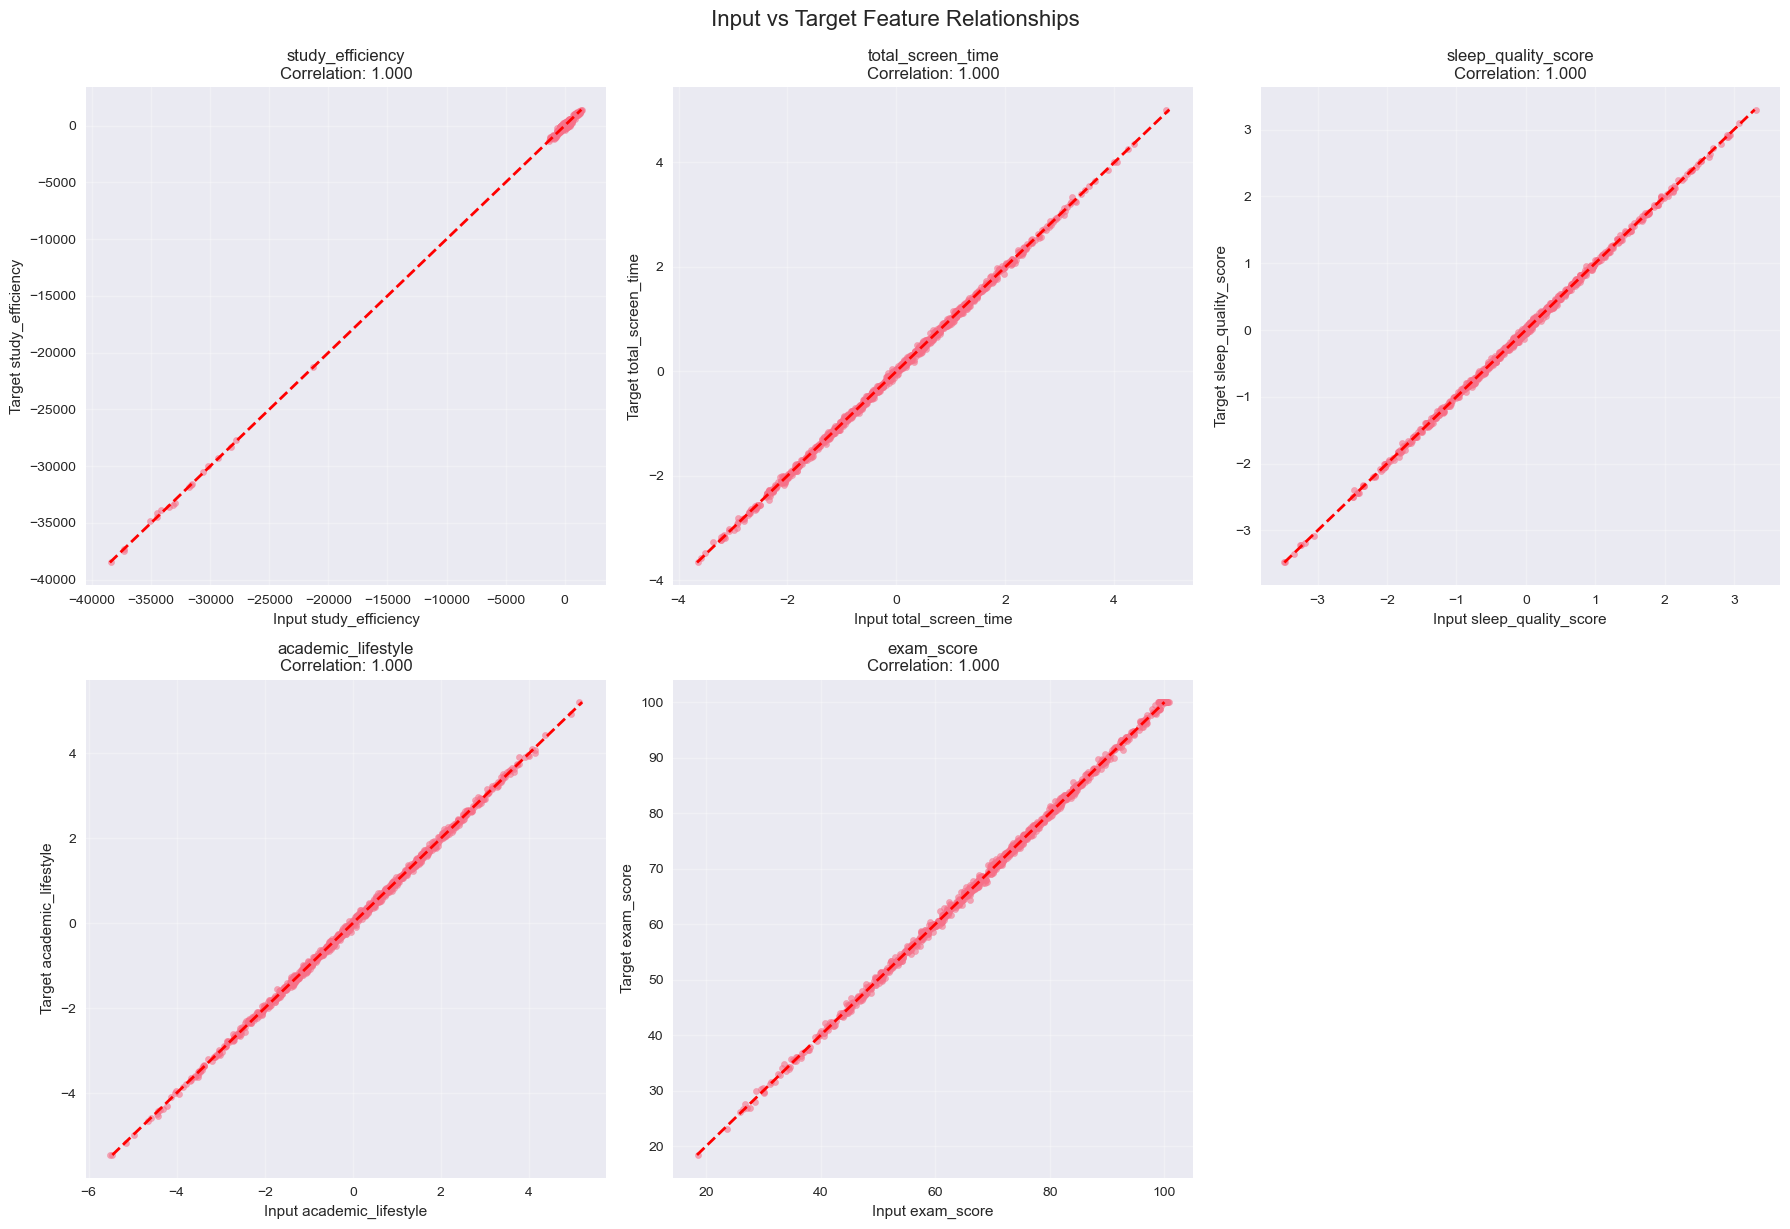

Data split: 800 train, 200 test
Skewed features: ['study_efficiency']
Normal features: ['total_screen_time', 'sleep_quality_score', 'academic_lifestyle', 'exam_score']
Preprocessing completed!
Input range: [-5.308, 4.936]
Target range: [-5.321, 4.646]

 PROCESSING COMPLETED!
Training data: (800, 5) → (800, 5)
Testing data: (200, 5) → (200, 5)
Features: ['study_efficiency', 'total_screen_time', 'sleep_quality_score', 'academic_lifestyle', 'exam_score']


In [33]:
processor_5to5 = Processor()
# Analisa selected features
high_corr_pairs = processor_5to5.analyze_selected_features(X_selected)

# Buat training strategy
X_input_5to5, X_target_5to5 = processor_5to5.training_strategy(X_selected)

# Visualisasi relationships
processor_5to5.visualize_5to5_data(X_input_5to5, X_target_5to5)

# Advanced preprocessing
X_train_5to5, X_test_5to5, y_train_5to5, y_test_5to5 = processor_5to5.advanced_preprocessing(
    X_input_5to5, X_target_5to5
)

print(f"\n PROCESSING COMPLETED!")
print(f"Training data: {X_train_5to5.shape} → {y_train_5to5.shape}")
print(f"Testing data: {X_test_5to5.shape} → {y_test_5to5.shape}")
print(f"Features: {fiturfix}")

### Arsitektur Model

In [34]:
class Arsitektur:
    """
    Arsitektur untuk models
    """

    def __init__(self):
        self.models = {}

    def autoencoder(self):
        """
        Autoencoder dengan attention
        """
        tf.keras.backend.clear_session()

        inputs = tf.keras.layers.Input(shape=(5,), name='input_features')

        # Attention mechanism
        attention_weights = tf.keras.layers.Dense(5, activation='softmax', name='attention')(inputs)
        attended_input = tf.keras.layers.Multiply(name='attended_features')([inputs, attention_weights])

        # Encoder
        x = tf.keras.layers.Dense(128, activation='swish', name='encoder_1')(attended_input)
        x = tf.keras.layers.BatchNormalization(name='encoder_bn1')(x)
        x = tf.keras.layers.Dropout(0.4, name='encoder_dropout1')(x)

        x = tf.keras.layers.Dense(64, activation='swish', name='encoder_2')(x)
        x = tf.keras.layers.BatchNormalization(name='encoder_bn2')(x)
        x = tf.keras.layers.Dropout(0.3, name='encoder_dropout2')(x)

        # Bottleneck
        bottleneck = tf.keras.layers.Dense(16, activation='swish', name='bottleneck')(x)
        bottleneck = tf.keras.layers.BatchNormalization(name='bottleneck_bn')(bottleneck)

        # Decoder
        x = tf.keras.layers.Dense(64, activation='swish', name='decoder_1')(bottleneck)
        x = tf.keras.layers.BatchNormalization(name='decoder_bn1')(x)
        x = tf.keras.layers.Dropout(0.3, name='decoder_dropout1')(x)

        x = tf.keras.layers.Dense(128, activation='swish', name='decoder_2')(x)
        x = tf.keras.layers.BatchNormalization(name='decoder_bn2')(x)
        x = tf.keras.layers.Dropout(0.4, name='decoder_dropout2')(x)

        # Output
        outputs = tf.keras.layers.Dense(5, activation='linear', name='reconstructed_features')(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs, name='enhanced_autoencoder')
        return model

    def deep_dense_model(self):
        """
        Deep dense model
        """
        tf.keras.backend.clear_session()

        inputs = tf.keras.layers.Input(shape=(5,), name='input_features')

        # Initial embedding
        x = tf.keras.layers.Dense(256, activation='swish', name='initial')(inputs)
        x = tf.keras.layers.BatchNormalization(name='initial_bn')(x)
        x = tf.keras.layers.Dropout(0.5, name='initial_dropout')(x)

        # Deep layers dengan gradual reduction
        x = tf.keras.layers.Dense(512, activation='swish', name='deep_1')(x)
        x = tf.keras.layers.BatchNormalization(name='deep_bn1')(x)
        x = tf.keras.layers.Dropout(0.4, name='deep_dropout1')(x)

        x = tf.keras.layers.Dense(256, activation='swish', name='deep_2')(x)
        x = tf.keras.layers.BatchNormalization(name='deep_bn2')(x)
        x = tf.keras.layers.Dropout(0.3, name='deep_dropout2')(x)

        x = tf.keras.layers.Dense(128, activation='swish', name='deep_3')(x)
        x = tf.keras.layers.BatchNormalization(name='deep_bn3')(x)
        x = tf.keras.layers.Dropout(0.2, name='deep_dropout3')(x)

        x = tf.keras.layers.Dense(64, activation='swish', name='deep_4')(x)
        x = tf.keras.layers.BatchNormalization(name='deep_bn4')(x)
        x = tf.keras.layers.Dropout(0.1, name='deep_dropout4')(x)

        # Output
        outputs = tf.keras.layers.Dense(5, activation='linear', name='enhanced_features')(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs, name='deep_dense')
        return model

    def wide_model(self):
        """
        Wide model untuk feature enhancement
        """
        tf.keras.backend.clear_session()

        inputs = tf.keras.layers.Input(shape=(5,), name='input_features')

        # Wide architecture
        x = tf.keras.layers.Dense(1024, activation='swish', name='wide_1')(inputs)
        x = tf.keras.layers.BatchNormalization(name='wide_bn1')(x)
        x = tf.keras.layers.Dropout(0.6, name='wide_dropout1')(x)

        x = tf.keras.layers.Dense(512, activation='swish', name='wide_2')(x)
        x = tf.keras.layers.BatchNormalization(name='wide_bn2')(x)
        x = tf.keras.layers.Dropout(0.4, name='wide_dropout2')(x)

        x = tf.keras.layers.Dense(256, activation='swish', name='wide_3')(x)
        x = tf.keras.layers.BatchNormalization(name='wide_bn3')(x)
        x = tf.keras.layers.Dropout(0.3, name='wide_dropout3')(x)

        # Output
        outputs = tf.keras.layers.Dense(5, activation='linear', name='enhanced_features')(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs, name='wide_model')
        return model

    def residual_model(self):
        """
        Residual model
        """
        tf.keras.backend.clear_session()

        inputs = tf.keras.layers.Input(shape=(5,), name='input_features')

        x = tf.keras.layers.Dense(128, activation='swish', name='initial')(inputs)
        x = tf.keras.layers.BatchNormalization(name='initial_bn')(x)

        # Residual blocks
        for i in range(3):
            residual = x

            # Block layers
            x = tf.keras.layers.Dense(128, activation='swish', name=f'res_{i}_1')(x)
            x = tf.keras.layers.BatchNormalization(name=f'res_{i}_bn1')(x)
            x = tf.keras.layers.Dropout(0.2, name=f'res_{i}_dropout1')(x)

            x = tf.keras.layers.Dense(128, activation='swish', name=f'res_{i}_2')(x)
            x = tf.keras.layers.BatchNormalization(name=f'res_{i}_bn2')(x)

            # Skip connection
            x = tf.keras.layers.Add(name=f'res_{i}_add')([x, residual])
            x = tf.keras.layers.Activation('swish', name=f'res_{i}_activation')(x)
            x = tf.keras.layers.Dropout(0.1, name=f'res_{i}_final_dropout')(x)

        # Final processing
        x = tf.keras.layers.Dense(64, activation='swish', name='final_1')(x)
        x = tf.keras.layers.BatchNormalization(name='final_bn')(x)
        x = tf.keras.layers.Dropout(0.3, name='final_dropout')(x)

        # Output
        outputs = tf.keras.layers.Dense(5, activation='linear', name='output_features')(x)

        model = tf.keras.Model(inputs=inputs, outputs=outputs, name='residual_model')
        return model

    def simple_baseline(self):
        """
        Simple baseline model
        """
        tf.keras.backend.clear_session()

        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(5,)),

            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.3),

            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.2),

            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dropout(0.1),

            tf.keras.layers.Dense(5, activation='linear')
        ], name='simple_baseline')

        return model

    def all_models(self):
        """
        Buat semua model
        """
        print("CREATING MODELS")
        print("="*50)

        models = {
            'enhanced_autoencoder': self.autoencoder(),
            'deep_dense': self.deep_dense_model(),
            'wide_model': self.wide_model(),
            'residual_model': self.residual_model(),
            'simple_baseline': self.simple_baseline()
        }

        print("Model architectures created:")
        for name, model in models.items():
            print(f" {name.replace('_', ' ').title()}: {model.count_params():,} parameters")

        print(f"\n RECOMMENDED MODEL (Enhanced Autoencoder):")
        models['enhanced_autoencoder'].summary()

        return models


architect_5to5 = Arsitektur()
effective_models = architect_5to5.all_models()

print(f"Selected features: {fiturfix}")

CREATING MODELS

Model architectures created:
 Enhanced Autoencoder: 21,747 parameters
 Deep Dense: 310,789 parameters
 Wide Model: 670,725 parameters
 Residual Model: 112,261 parameters
 Simple Baseline: 12,037 parameters

 RECOMMENDED MODEL (Enhanced Autoencoder):


Model: "enhanced_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_features      │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention (Dense)   │ (None, 5)         │         30 │ input_features[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attended_features   │ (None, 5)         │          0 │ input_features[0… │
│ (Multiply)          │                   │            │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_1 (Dense)   │ (None, 128)       │        768 │ attended_feature… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_bn1         │ (None, 128)       │        512 │ encoder_1[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_dropout1    │ (None, 128)       │          0 │ encoder_bn1[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_2 (Dense)   │ (None, 64)        │      8,256 │ encoder_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_bn2         │ (None, 64)        │        256 │ encoder_2[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_dropout2    │ (None, 64)        │          0 │ encoder_bn2[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bottleneck (Dense)  │ (None, 16)        │      1,040 │ encoder_dropout2… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bottleneck_bn       │ (None, 16)        │         64 │ bottleneck[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_1 (Dense)   │ (None, 64)        │      1,088 │ bottleneck_bn[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_bn1         │ (None, 64)        │        256 │ decoder_1[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_dropout1    │ (None, 64)        │          0 │ decoder_bn1[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_2 (Dense)   │ (None, 128)       │      8,320 │ decoder_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_bn2         │ (None, 128)       │        512 │ decoder_2[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_dropout2    │ (None, 128)       │          0 │ decoder_bn2[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reconstructed_feat… │ (None, 5)         │        645 │ decoder_dropout2… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 21,747 (84.95 KB)

 Trainable params: 20,947 (81.82 KB)

 Non-trainable params: 800 (3.12 KB)

Selected features: ['study_efficiency', 'total_screen_time', 'sleep_quality_score', 'academic_lifestyle', 'exam_score']


### Model Trainer

In [35]:
class ModelTrainer:
    """
    Trainer
    """
    def __init__(self):
        self.training_history = {}
        self.best_models = {}
        self.evaluation_results = {}

    def callbacks(self, model_name):
        """
        Create callbacks
        """
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=15,
                restore_best_weights=True,
                verbose=1,
                mode='min'
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.7,
                patience=8,
                min_lr=1e-7,
                verbose=1,
                mode='min'
            )
        ]
        return callbacks

    def train_single_model(self, model, model_name, X_train, y_train, X_test, y_test, epochs=100):
        """
        Train single model
        """
        print(f"Training {model_name}...")

        # Compile model
        if 'autoencoder' in model_name or 'residual' in model_name:
            optimizer = Adam(learning_rate=0.001)
        else:
            optimizer = Adam(learning_rate=0.001)

        model.compile(
            optimizer=optimizer,
            loss='mse',
            metrics=['mae']
        )

        callbacks = self.callbacks(model_name)

        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=epochs,
            batch_size=32,
            callbacks=callbacks,
            verbose=1,
            shuffle=True
        )

        self.training_history[model_name] = history.history

        return model, history

    def train_all_models(self, models_dict, X_train, y_train, X_test, y_test):
        """
        Train all models
        """
        print("TRAINING ALL MODELS ")
        print("=" * 50)

        trained_models = {}

        for model_name, model in models_dict.items():
            print(f"\n Training {model_name.replace('_', ' ').title()}")
            print("-" * 40)

            try:
                trained_model, history = self.train_single_model(
                    model, model_name, X_train, y_train, X_test, y_test
                )
                trained_models[model_name] = trained_model
                self.best_models[model_name] = trained_model

                val_loss = min(history.history['val_loss'])
                val_mae = min(history.history['val_mae'])

                print(f" {model_name} completed!")
                print(f"   Best Val Loss: {val_loss:.6f}")
                print(f"   Best Val MAE: {val_mae:.6f}")

            except Exception as e:
                print(f" Error training {model_name}: {str(e)}")
                print(f"   Skipping this model and continuing...")
                continue

        if not trained_models:
            print("\n No models trained successfully. Creating fallback model...")
            fallback_model = self.fallback_model()
            try:
                trained_model, history = self.train_single_model(
                    fallback_model, 'fallback_model', X_train, y_train, X_test, y_test
                )
                trained_models['fallback_model'] = trained_model
                self.best_models['fallback_model'] = trained_model
                print("Fallback model trained successfully!")
            except Exception as e:
                print(f"Even fallback model failed: {str(e)}")

        return trained_models

    def fallback_model(self):
        """
        simple model sebagai fallback
        """
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(5,)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(5, activation='linear')
        ], name='simple_fallback')

        return model

    def evaluate_models(self, trained_models, X_test, y_test, feature_names):
        """
        Evaluate all trained models
        """

        evaluation_results = {}

        for model_name, model in trained_models.items():
            print(f"\nEvaluating {model_name}...")

            try:
                y_pred = model.predict(X_test, verbose=0)

                # Overall metrics
                mse = mean_squared_error(y_test, y_pred)
                mae = mean_absolute_error(y_test, y_pred)
                rmse = np.sqrt(mse)

                # R2 score untuk each feature
                r2_scores = []
                for i in range(y_test.shape[1]):
                    r2 = r2_score(y_test[:, i], y_pred[:, i])
                    r2_scores.append(r2)

                avg_r2 = np.mean(r2_scores)

                # Feature-wise evaluation
                feature_metrics = {}
                for i, feature in enumerate(feature_names):
                    feature_mse = mean_squared_error(y_test[:, i], y_pred[:, i])
                    feature_mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
                    feature_r2 = r2_score(y_test[:, i], y_pred[:, i])

                    feature_metrics[feature] = {
                        'mse': feature_mse,
                        'mae': feature_mae,
                        'r2': feature_r2
                    }

                evaluation_results[model_name] = {
                    'overall_mse': mse,
                    'overall_mae': mae,
                    'overall_rmse': rmse,
                    'overall_r2': avg_r2,
                    'feature_r2_scores': r2_scores,
                    'feature_metrics': feature_metrics,
                    'predictions': y_pred
                }

                print(f"   Overall MSE: {mse:.6f}")
                print(f"   Overall MAE: {mae:.6f}")
                print(f"   Overall RMSE: {rmse:.6f}")
                print(f"   Average R²: {avg_r2:.6f}")

            except Exception as e:
                print(f"   Error evaluating {model_name}: {str(e)}")
                continue

        self.evaluation_results = evaluation_results
        return evaluation_results

    def find_best_model(self, evaluation_results):
        """
        Find best model
        """
        if not evaluation_results:
            print("No models to evaluate!")
            return None, None

        print("\nFINDING BEST MODEL")
        print("=" * 30)

        # Find best by R2 score
        best_model_name = max(evaluation_results.keys(),
                             key=lambda x: evaluation_results[x]['overall_r2'])

        print(f"\nBEST MODEL: {best_model_name.replace('_', ' ').title()}")

        best_results = evaluation_results[best_model_name]
        print(f"   MSE: {best_results['overall_mse']:.6f}")
        print(f"   MAE: {best_results['overall_mae']:.6f}")
        print(f"   R²: {best_results['overall_r2']:.6f}")

        return best_model_name, self.best_models[best_model_name]

In [36]:
fixed_trainer = ModelTrainer()

# Train all models
trained_models = fixed_trainer.train_all_models(
    effective_models, X_train_5to5, y_train_5to5, X_test_5to5, y_test_5to5
)

print(f"\nTRAINING COMPLETED!")
print(f"Successfully trained: {list(trained_models.keys())}")

# Evaluate models
if trained_models:
    evaluation_results = fixed_trainer.evaluate_models(
        trained_models, X_test_5to5, y_test_5to5, fiturfix
    )

    best_model_name, best_model = fixed_trainer.find_best_model(evaluation_results)

    if best_model_name:
        print(f"\nBEST MODEL SELECTED: {best_model_name}")

        trainer = fixed_trainer

    else:
        print("Tidak ada model lain untuk perbandingan")
else:
    print("Tidak ada model yang berhasil")

TRAINING ALL MODELS 

 Training Enhanced Autoencoder
----------------------------------------
Training enhanced_autoencoder...
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 3.4257 - mae: 1.3894 - val_loss: 0.9003 - val_mae: 0.6630 - learning_rate: 0.0010
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2968 - mae: 1.1326 - val_loss: 0.8982 - val_mae: 0.6589 - learning_rate: 0.0010
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8894 - mae: 1.0325 - val_loss: 0.8929 - val_mae: 0.6574 - learning_rate: 0.0010
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6667 - mae: 0.9726 - val_loss: 0.8866 - val_mae: 0.6550 - learning_rate: 0.0010
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5579 - mae: 0.9140 - val_loss: 0.8728 - val_mae: 0.6469 - learning_rate: 0.0010
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2909 - mae: 0.8442 - val_loss: 0.8580 - val_mae: 0.6405 - learning_rate: 0.0010
Epoch 7/100
25/25 ━━━━━━━━

In [37]:
class TrainingVisualizer:
    """
    Class untuk visualisasi pelatihan model
    """

    def __init__(self):
        self.colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
        self.target_names = ['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'netflix_hours']

    def plot_training_history(self, training_history, model_names=None):
        """
        Visualisasi history training untuk semua model
        """
        if model_names is None:
            model_names = list(training_history.keys())

        print(" Membuat visualisasi training history...")

        # Setup subplot
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Training History - Semua Model', fontsize=16, fontweight='bold')

        # Plot 1: Training Loss
        axes[0,0].set_title('Training Loss', fontweight='bold')
        for i, model_name in enumerate(model_names):
            if model_name in training_history:
                history = training_history[model_name]
                if 'loss' in history:
                    epochs = range(1, len(history['loss']) + 1)
                    axes[0,0].plot(epochs, history['loss'],
                                  label=model_name, color=self.colors[i % len(self.colors)],
                                  linewidth=2, alpha=0.8)

        axes[0,0].set_xlabel('Epoch')
        axes[0,0].set_ylabel('Loss')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)

        # Plot 2: Validation Loss
        axes[0,1].set_title('Validation Loss', fontweight='bold')
        for i, model_name in enumerate(model_names):
            if model_name in training_history:
                history = training_history[model_name]
                if 'val_loss' in history:
                    epochs = range(1, len(history['val_loss']) + 1)
                    axes[0,1].plot(epochs, history['val_loss'],
                                  label=model_name, color=self.colors[i % len(self.colors)],
                                  linewidth=2, alpha=0.8)

        axes[0,1].set_xlabel('Epoch')
        axes[0,1].set_ylabel('Validation Loss')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)

        # Plot 3: Training MAE
        axes[1,0].set_title('Training MAE', fontweight='bold')
        for i, model_name in enumerate(model_names):
            if model_name in training_history:
                history = training_history[model_name]
                if 'mae' in history:
                    epochs = range(1, len(history['mae']) + 1)
                    axes[1,0].plot(epochs, history['mae'],
                                  label=model_name, color=self.colors[i % len(self.colors)],
                                  linewidth=2, alpha=0.8)

        axes[1,0].set_xlabel('Epoch')
        axes[1,0].set_ylabel('MAE')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)

        # Plot 4: Validation MAE
        axes[1,1].set_title('Validation MAE', fontweight='bold')
        for i, model_name in enumerate(model_names):
            if model_name in training_history:
                history = training_history[model_name]
                if 'val_mae' in history:
                    epochs = range(1, len(history['val_mae']) + 1)
                    axes[1,1].plot(epochs, history['val_mae'],
                                  label=model_name, color=self.colors[i % len(self.colors)],
                                  linewidth=2, alpha=0.8)

        axes[1,1].set_xlabel('Epoch')
        axes[1,1].set_ylabel('Validation MAE')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()
        print("Training history visualization selesai!")

    def plot_model_comparison(self, evaluation_results):
        """
        Membandingkan performa semua model
        """
        print("Membuat perbandingan performa model...")

        model_names = list(evaluation_results.keys())
        metrics = ['overall_mse', 'overall_mae', 'overall_rmse', 'overall_r2']
        metric_labels = ['MSE', 'MAE', 'RMSE', 'R² Score']

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('🏆 Perbandingan Performa Model', fontsize=16, fontweight='bold')

        for i, (metric, label) in enumerate(zip(metrics, metric_labels)):
            row = i // 2
            col = i % 2

            values = [evaluation_results[model][metric] for model in model_names]

            # Bar plot dengan warna berbeda
            bars = axes[row, col].bar(model_names, values,
                                     color=self.colors[:len(model_names)],
                                     alpha=0.8, edgecolor='black', linewidth=1)

            axes[row, col].set_title(f'📊 {label}', fontweight='bold')
            axes[row, col].set_ylabel(label)
            axes[row, col].tick_params(axis='x', rotation=45)
            axes[row, col].grid(True, alpha=0.3, axis='y')

            # Tambahkan nilai di atas bar
            for bar, value in zip(bars, values):
                height = bar.get_height()
                axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                                   f'{value:.4f}', ha='center', va='bottom',
                                   fontweight='bold', fontsize=9)

        plt.tight_layout()
        plt.show()

        # Print best model summary
        best_model = max(evaluation_results.keys(),
                        key=lambda x: evaluation_results[x]['overall_r2'])
        print(f"\n🥇 MODEL TERBAIK: {best_model}")
        print(f"   R² Score: {evaluation_results[best_model]['overall_r2']:.4f}")
        print(f"   MSE: {evaluation_results[best_model]['overall_mse']:.4f}")
        print(f"   MAE: {evaluation_results[best_model]['overall_mae']:.4f}")

    def plot_predictions_vs_actual(self, evaluation_results, model_name, X_test, y_test):
        """
        Plot prediksi vs actual untuk model tertentu
        """
        print(f" Membuat plot prediksi vs actual untuk {model_name}...")

        if model_name not in evaluation_results:
            print(f"Model {model_name} tidak ditemukan!")
            return

        predictions = evaluation_results[model_name]['predictions']

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'🎯 Prediksi vs Actual - {model_name}', fontsize=16, fontweight='bold')

        for i, target_name in enumerate(self.target_names):
            row = i // 2
            col = i % 2

            if i < y_test.shape[1]:
                actual = y_test[:, i]
                pred = predictions[:, i]

                # Scatter plot
                axes[row, col].scatter(actual, pred, alpha=0.6,
                                     color=self.colors[i], s=30, edgecolors='black', linewidth=0.5)

                # Perfect prediction line
                min_val = min(actual.min(), pred.min())
                max_val = max(actual.max(), pred.max())
                axes[row, col].plot([min_val, max_val], [min_val, max_val],
                                   'r--', linewidth=2, label='Perfect Prediction')

                # Calculate R²
                r2 = r2_score(actual, pred)

                axes[row, col].set_xlabel(f'Actual {target_name.replace("_", " ").title()}')
                axes[row, col].set_ylabel(f'Predicted {target_name.replace("_", " ").title()}')
                axes[row, col].set_title(f'{target_name.replace("_", " ").title()}\nR² = {r2:.4f}',
                                        fontweight='bold')
                axes[row, col].legend()
                axes[row, col].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()
        print("Predictions vs actual plot selesai!")

    def plot_feature_importance_analysis(self, fiturfix, X_selected):
        """
        Analisis pentingnya fitur yang dipilih
        """
        print("Menganalisis pentingnya fitur...")

        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('Analisis Fitur Terpilih', fontsize=16, fontweight='bold')

        # Plot 1: Feature Correlation Matrix
        corr_matrix = X_selected.corr()
        im1 = axes[0,0].imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
        axes[0,0].set_xticks(range(len(fiturfix)))
        axes[0,0].set_yticks(range(len(fiturfix)))
        axes[0,0].set_xticklabels([f.replace('_', '\n') for f in fiturfix], rotation=45)
        axes[0,0].set_yticklabels([f.replace('_', '\n') for f in fiturfix])
        axes[0,0].set_title(' Korelasi Antar Fitur', fontweight='bold')

        # Tambahkan nilai korelasi
        for i in range(len(fiturfix)):
            for j in range(len(fiturfix)):
                text = axes[0,0].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                                     ha="center", va="center", color="black", fontweight='bold')

        plt.colorbar(im1, ax=axes[0,0])

        # Plot 2: Feature Distribution
        axes[0,1].set_title('Distribusi Fitur', fontweight='bold')
        for i, feature in enumerate(fiturfix):
            axes[0,1].hist(X_selected[feature], alpha=0.6,
                          label=feature.replace('_', ' '),
                          color=self.colors[i % len(self.colors)], bins=20)
        axes[0,1].set_xlabel('Nilai')
        axes[0,1].set_ylabel('Frekuensi')
        axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[0,1].grid(True, alpha=0.3)

        # Plot 3: Feature Statistics
        feature_stats = X_selected.describe().T
        axes[1,0].set_title('Statistik Fitur', fontweight='bold')
        x_pos = range(len(fiturfix))
        width = 0.35

        axes[1,0].bar([x - width/2 for x in x_pos], feature_stats['mean'],
                     width, label='Mean', alpha=0.8, color=self.colors[0])
        axes[1,0].bar([x + width/2 for x in x_pos], feature_stats['std'],
                     width, label='Std', alpha=0.8, color=self.colors[1])

        axes[1,0].set_xlabel('Fitur')
        axes[1,0].set_ylabel('Nilai')
        axes[1,0].set_xticks(x_pos)
        axes[1,0].set_xticklabels([f.replace('_', '\n') for f in fiturfix])
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3, axis='y')

        # Plot 4: Feature Variance
        axes[1,1].set_title('Variance Fitur', fontweight='bold')
        variances = [X_selected[feature].var() for feature in fiturfix]
        bars = axes[1,1].bar(range(len(fiturfix)), variances,
                            color=self.colors[:len(fiturfix)], alpha=0.8)

        axes[1,1].set_xlabel('Fitur')
        axes[1,1].set_ylabel('Variance')
        axes[1,1].set_xticks(range(len(fiturfix)))
        axes[1,1].set_xticklabels([f.replace('_', '\n') for f in fiturfix], rotation=45)
        axes[1,1].grid(True, alpha=0.3, axis='y')

        # Tambahkan nilai variance di atas bar
        for i, (bar, var) in enumerate(zip(bars, variances)):
            height = bar.get_height()
            axes[1,1].text(bar.get_x() + bar.get_width()/2., height,
                          f'{var:.2f}', ha='center', va='bottom',
                          fontweight='bold', fontsize=9)

        plt.tight_layout()
        plt.show()
        print("Feature importance analysis selesai!")

In [38]:
class InteractiveVisualizer:
    """
    Visualizer interaktif menggunakan Plotly - mudah untuk pemula
    """

    def __init__(self):
        self.colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
        self.target_names = ['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'netflix_hours']

    def create_interactive_training_plot(self, training_history):
        """
        Membuat plot training interaktif
        """
        print("🚀 Membuat visualisasi training interaktif...")

        # Buat subplot
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('Training Loss', 'Validation Loss', 'Training MAE', 'Validation MAE'),
            vertical_spacing=0.1
        )

        model_names = list(training_history.keys())

        for i, model_name in enumerate(model_names):
            history = training_history[model_name]
            color = self.colors[i % len(self.colors)]

            if 'loss' in history:
                epochs = list(range(1, len(history['loss']) + 1))
                fig.add_trace(
                    go.Scatter(x=epochs, y=history['loss'],
                             name=f'{model_name} - Train Loss',
                             line=dict(color=color, width=3),
                             hovertemplate='<b>%{fullData.name}</b><br>Epoch: %{x}<br>Loss: %{y:.6f}<extra></extra>'),
                    row=1, col=1
                )

            if 'val_loss' in history:
                epochs = list(range(1, len(history['val_loss']) + 1))
                fig.add_trace(
                    go.Scatter(x=epochs, y=history['val_loss'],
                             name=f'{model_name} - Val Loss',
                             line=dict(color=color, width=3, dash='dash'),
                             hovertemplate='<b>%{fullData.name}</b><br>Epoch: %{x}<br>Val Loss: %{y:.6f}<extra></extra>'),
                    row=1, col=2
                )

            if 'mae' in history:
                epochs = list(range(1, len(history['mae']) + 1))
                fig.add_trace(
                    go.Scatter(x=epochs, y=history['mae'],
                             name=f'{model_name} - Train MAE',
                             line=dict(color=color, width=3),
                             hovertemplate='<b>%{fullData.name}</b><br>Epoch: %{x}<br>MAE: %{y:.6f}<extra></extra>'),
                    row=2, col=1
                )

            if 'val_mae' in history:
                epochs = list(range(1, len(history['val_mae']) + 1))
                fig.add_trace(
                    go.Scatter(x=epochs, y=history['val_mae'],
                             name=f'{model_name} - Val MAE',
                             line=dict(color=color, width=3, dash='dash'),
                             hovertemplate='<b>%{fullData.name}</b><br>Epoch: %{x}<br>Val MAE: %{y:.6f}<extra></extra>'),
                    row=2, col=2
                )

        fig.update_layout(
            title=dict(text=' Interactive Training History', x=0.5, font_size=20),
            height=700,
            showlegend=True,
            hovermode='closest'
        )

        fig.update_xaxes(title_text="Epoch")
        fig.update_yaxes(title_text="Loss", row=1, col=1)
        fig.update_yaxes(title_text="Loss", row=1, col=2)
        fig.update_yaxes(title_text="MAE", row=2, col=1)
        fig.update_yaxes(title_text="MAE", row=2, col=2)

        fig.show()
        print("Interactive training plot berhasil dibuat!")

    def create_model_performance_dashboard(self, evaluation_results):
        """
        Dashboard performa model interaktif
        """
        print(" Membuat dashboard performa model...")

        model_names = list(evaluation_results.keys())

        # Extract metrics
        metrics_data = {
            'Model': model_names,
            'MSE': [evaluation_results[model]['overall_mse'] for model in model_names],
            'MAE': [evaluation_results[model]['overall_mae'] for model in model_names],
            'RMSE': [evaluation_results[model]['overall_rmse'] for model in model_names],
            'R2_Score': [evaluation_results[model]['overall_r2'] for model in model_names]
        }

        # Buat subplot
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('MSE Comparison', 'MAE Comparison', 'RMSE Comparison', 'R² Score Comparison'),
            specs=[[{"type": "bar"}, {"type": "bar"}],
                   [{"type": "bar"}, {"type": "bar"}]]
        )

        # MSE
        fig.add_trace(
            go.Bar(x=model_names, y=metrics_data['MSE'],
                   name='MSE', marker_color=self.colors[0],
                   hovertemplate='<b>%{x}</b><br>MSE: %{y:.6f}<extra></extra>'),
            row=1, col=1
        )

        # MAE
        fig.add_trace(
            go.Bar(x=model_names, y=metrics_data['MAE'],
                   name='MAE', marker_color=self.colors[1],
                   hovertemplate='<b>%{x}</b><br>MAE: %{y:.6f}<extra></extra>'),
            row=1, col=2
        )

        # RMSE
        fig.add_trace(
            go.Bar(x=model_names, y=metrics_data['RMSE'],
                   name='RMSE', marker_color=self.colors[2],
                   hovertemplate='<b>%{x}</b><br>RMSE: %{y:.6f}<extra></extra>'),
            row=2, col=1
        )

        # R² Score
        fig.add_trace(
            go.Bar(x=model_names, y=metrics_data['R2_Score'],
                   name='R² Score', marker_color=self.colors[3],
                   hovertemplate='<b>%{x}</b><br>R² Score: %{y:.6f}<extra></extra>'),
            row=2, col=2
        )

        fig.update_layout(
            title=dict(text='Model Performance Dashboard', x=0.5, font_size=20),
            height=700,
            showlegend=False
        )

        fig.show()
        print(" Performance dashboard berhasil dibuat!")

    def create_3d_predictions_plot(self, evaluation_results, model_name, X_test, y_test):
        """
        Plot prediksi 3D interaktif
        """
        print(f" Membuat 3D predictions plot untuk {model_name}...")

        if model_name not in evaluation_results:
            print(f"Model {model_name} tidak ditemukan!")
            return

        predictions = evaluation_results[model_name]['predictions']

        # Buat subplot 3D
        fig = make_subplots(
            rows=2, cols=2,
            specs=[[{"type": "scatter3d"}, {"type": "scatter3d"}],
                   [{"type": "scatter3d"}, {"type": "scatter3d"}]],
            subplot_titles=[f'{name.replace("_", " ").title()}' for name in self.target_names]
        )

        for i, target_name in enumerate(self.target_names):
            row = (i // 2) + 1
            col = (i % 2) + 1

            if i < y_test.shape[1]:
                actual = y_test[:, i]
                pred = predictions[:, i]

                # Calculate residuals
                residuals = actual - pred

                fig.add_trace(
                    go.Scatter3d(
                        x=actual,
                        y=pred,
                        z=residuals,
                        mode='markers',
                        marker=dict(
                            size=5,
                            color=residuals,
                            colorscale='RdYlBu',
                            showscale=True if i == 0 else False,
                            colorbar=dict(title="Residuals") if i == 0 else None
                        ),
                        name=target_name,
                        hovertemplate='<b>%{fullData.name}</b><br>Actual: %{x:.3f}<br>Predicted: %{y:.3f}<br>Residual: %{z:.3f}<extra></extra>'
                    ),
                    row=row, col=col
                )

        fig.update_layout(
            title=dict(text=f'3D Predictions Analysis - {model_name}', x=0.5, font_size=20),
            height=800
        )

        # Update 3D scene
        for i in range(1, 5):
            row = ((i-1) // 2) + 1
            col = ((i-1) % 2) + 1
            scene_name = f'scene{i}' if i > 1 else 'scene'

            fig.update_layout(**{
                scene_name: dict(
                    xaxis_title='Actual',
                    yaxis_title='Predicted',
                    zaxis_title='Residuals'
                )
            })

        fig.show()
        print("3D predictions plot berhasil dibuat!")

In [39]:
def visualize_training_results():
    """
    Fungsi utama untuk menjalankan semua visualisasi
    """

    print("🎉 MEMULAI VISUALISASI HASIL TRAINING")
    print("=" * 50)

    # 1. Buat visualizer objects
    vis = TrainingVisualizer()
    interactive_vis = InteractiveVisualizer()

    # 2. Cek apakah variable yang dibutuhkan ada
    required_vars = ['trainer', 'evaluation_results', 'fiturfix', 'X_selected', 'X_test_5to5', 'y_test_5to5']
    missing_vars = []

    for var_name in required_vars:
        if var_name not in globals():
            missing_vars.append(var_name)

    if missing_vars:
        print(f"❌ Variable berikut belum ada: {missing_vars}")
        print("🔧 Pastikan Anda sudah menjalankan training model terlebih dahulu!")
        return

    try:
        # 3. Training History Visualization
        print("\n📊 1. Membuat Training History Plots...")
        if hasattr(trainer, 'training_history') and trainer.training_history:
            vis.plot_training_history(trainer.training_history)
            interactive_vis.create_interactive_training_plot(trainer.training_history)
        else:
            print("⚠️ Training history tidak ditemukan, skip...")

        # 4. Model Comparison
        print("\n🏆 2. Membuat Model Comparison...")
        if evaluation_results:
            vis.plot_model_comparison(evaluation_results)
            interactive_vis.create_model_performance_dashboard(evaluation_results)
        else:
            print("⚠️ Evaluation results tidak ditemukan, skip...")

        # 5. Feature Analysis
        print("\n🔍 3. Membuat Feature Analysis...")
        if 'fiturfix' in globals() and 'X_selected' in globals():
            vis.plot_feature_importance_analysis(fiturfix, X_selected)
        else:
            print("⚠️ Feature data tidak ditemukan, skip...")

        # 6. Predictions vs Actual (untuk model terbaik)
        print("\n🎯 4. Membuat Predictions vs Actual...")
        if evaluation_results and 'X_test_5to5' in globals() and 'y_test_5to5' in globals():
            # Cari model terbaik
            best_model_name = max(evaluation_results.keys(),
                                key=lambda x: evaluation_results[x]['overall_r2'])

            print(f"📈 Menganalisis model terbaik: {best_model_name}")

            # Plot predictions vs actual
            vis.plot_predictions_vs_actual(evaluation_results, best_model_name,
                                          X_test_5to5, y_test_5to5)

            # Interactive 3D plot
            interactive_vis.create_3d_predictions_plot(evaluation_results, best_model_name,
                                                     X_test_5to5, y_test_5to5)
        else:
            print("⚠️ Test data tidak ditemukan, skip...")

        # 7. Summary Report
        print("\n📋 5. Membuat Summary Report...")
        create_summary_report(evaluation_results, fiturfix)

        print("\n🎉 SEMUA VISUALISASI SELESAI!")
        print("✅ Cek semua plot yang sudah dibuat di atas")

    except Exception as e:
        print(f"❌ Error saat membuat visualisasi: {str(e)}")
        print("💡 Pastikan semua variable training sudah tersedia")

def create_summary_report(evaluation_results, feature_names):
    """
    Membuat laporan ringkasan yang mudah dibaca
    """
    print("\n📋 LAPORAN RINGKASAN TRAINING")
    print("=" * 50)

    if not evaluation_results:
        print("❌ Tidak ada hasil evaluasi untuk dianalisis")
        return

    # Model terbaik
    best_model = max(evaluation_results.keys(),
                    key=lambda x: evaluation_results[x]['overall_r2'])
    best_r2 = evaluation_results[best_model]['overall_r2']

    print(f"\n🥇 MODEL TERBAIK: {best_model}")
    print(f"   📊 R² Score: {best_r2:.4f} ({best_r2*100:.1f}%)")
    print(f"   📉 MSE: {evaluation_results[best_model]['overall_mse']:.6f}")
    print(f"   📈 MAE: {evaluation_results[best_model]['overall_mae']:.6f}")

    # Ranking semua model
    print(f"\n🏆 RANKING SEMUA MODEL:")
    sorted_models = sorted(evaluation_results.items(),
                          key=lambda x: x[1]['overall_r2'], reverse=True)

    for i, (model_name, results) in enumerate(sorted_models, 1):
        print(f"   {i}. {model_name}: R² = {results['overall_r2']:.4f}")

    # Analisis fitur
    print(f"\n🔍 FITUR YANG DIGUNAKAN:")
    for i, feature in enumerate(feature_names, 1):
        print(f"   {i}. {feature.replace('_', ' ').title()}")

    # Rekomendasi
    print(f"\n💡 REKOMENDASI:")
    if best_r2 > 0.8:
        print("   ✅ Model memiliki performa sangat baik!")
        print("   🚀 Siap untuk deployment")
    elif best_r2 > 0.6:
        print("   ⚠️ Model memiliki performa cukup baik")
        print("   🔧 Pertimbangkan tuning hyperparameter")
    else:
        print("   ❌ Model perlu perbaikan")
        print("   🔄 Coba tambah data atau ubah arsitektur")

    print(f"\n📊 PERFORMA PER TARGET:")
    best_results = evaluation_results[best_model]
    target_names = ['study_hours_per_day', 'sleep_hours', 'social_media_hours', 'netflix_hours']

    if 'feature_r2_scores' in best_results:
        for i, (target, r2_score) in enumerate(zip(target_names, best_results['feature_r2_scores'])):
            if i < len(best_results['feature_r2_scores']):
                print(f"   📚 {target.replace('_', ' ').title()}: R² = {r2_score:.4f}")


def quick_visualize():
    """
    Fungsi super cepat untuk visualisasi - tinggal panggil ini!
    """
    print("⚡ QUICK VISUALIZE - MULAI!")

    try:
        visualize_training_results()
    except Exception as e:
        print(f"❌ Error: {str(e)}")
        print("\n🔧 TROUBLESHOOTING:")
        print("1. Pastikan Anda sudah menjalankan training model")
        print("2. Pastikan variable 'trainer' dan 'evaluation_results' ada")
        print("3. Coba jalankan cell training terlebih dahulu")

def check_variables():
    """
    Cek apakah semua variable yang dibutuhkan sudah ada
    """
    print("🔍 MENGECEK VARIABLE YANG DIBUTUHKAN...")

    required_vars = {
        'trainer': 'Object trainer hasil training',
        'evaluation_results': 'Hasil evaluasi model',
        'fiturfix': 'List nama fitur terpilih',
        'X_selected': 'Data fitur yang sudah dipilih',
        'X_test_5to5': 'Data test untuk input',
        'y_test_5to5': 'Data test untuk target'
    }

    available = []
    missing = []

    for var_name, description in required_vars.items():
        if var_name in globals():
            available.append(f"✅ {var_name}: {description}")
        else:
            missing.append(f"❌ {var_name}: {description}")

    print("\n📊 STATUS VARIABLE:")
    for item in available:
        print(f"   {item}")

    if missing:
        print("\n⚠️ VARIABLE YANG HILANG:")
        for item in missing:
            print(f"   {item}")
        print("\n💡 Jalankan cell training model terlebih dahulu!")
    else:
        print("\n🎉 SEMUA VARIABLE LENGKAP! Siap untuk visualisasi!")

⚡ QUICK VISUALIZE - MULAI!
🎉 MEMULAI VISUALISASI HASIL TRAINING

📊 1. Membuat Training History Plots...
 Membuat visualisasi training history...


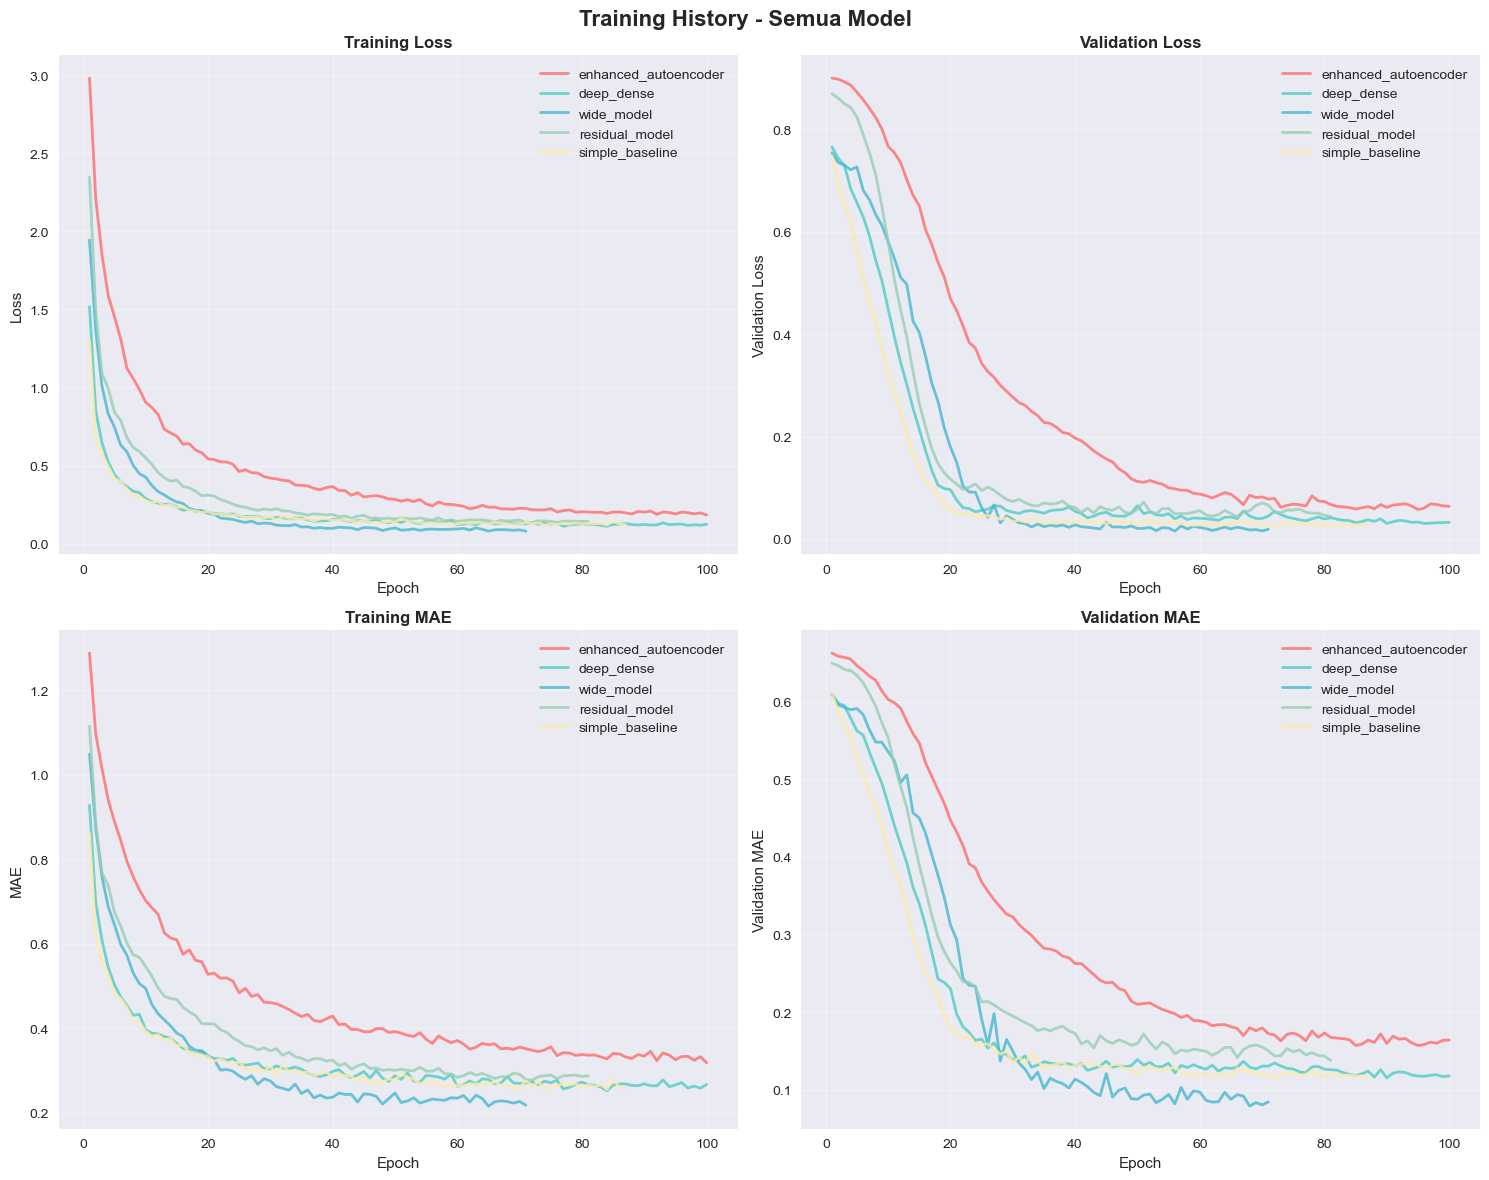

Training history visualization selesai!
🚀 Membuat visualisasi training interaktif...


Interactive training plot berhasil dibuat!

🏆 2. Membuat Model Comparison...
Membuat perbandingan performa model...


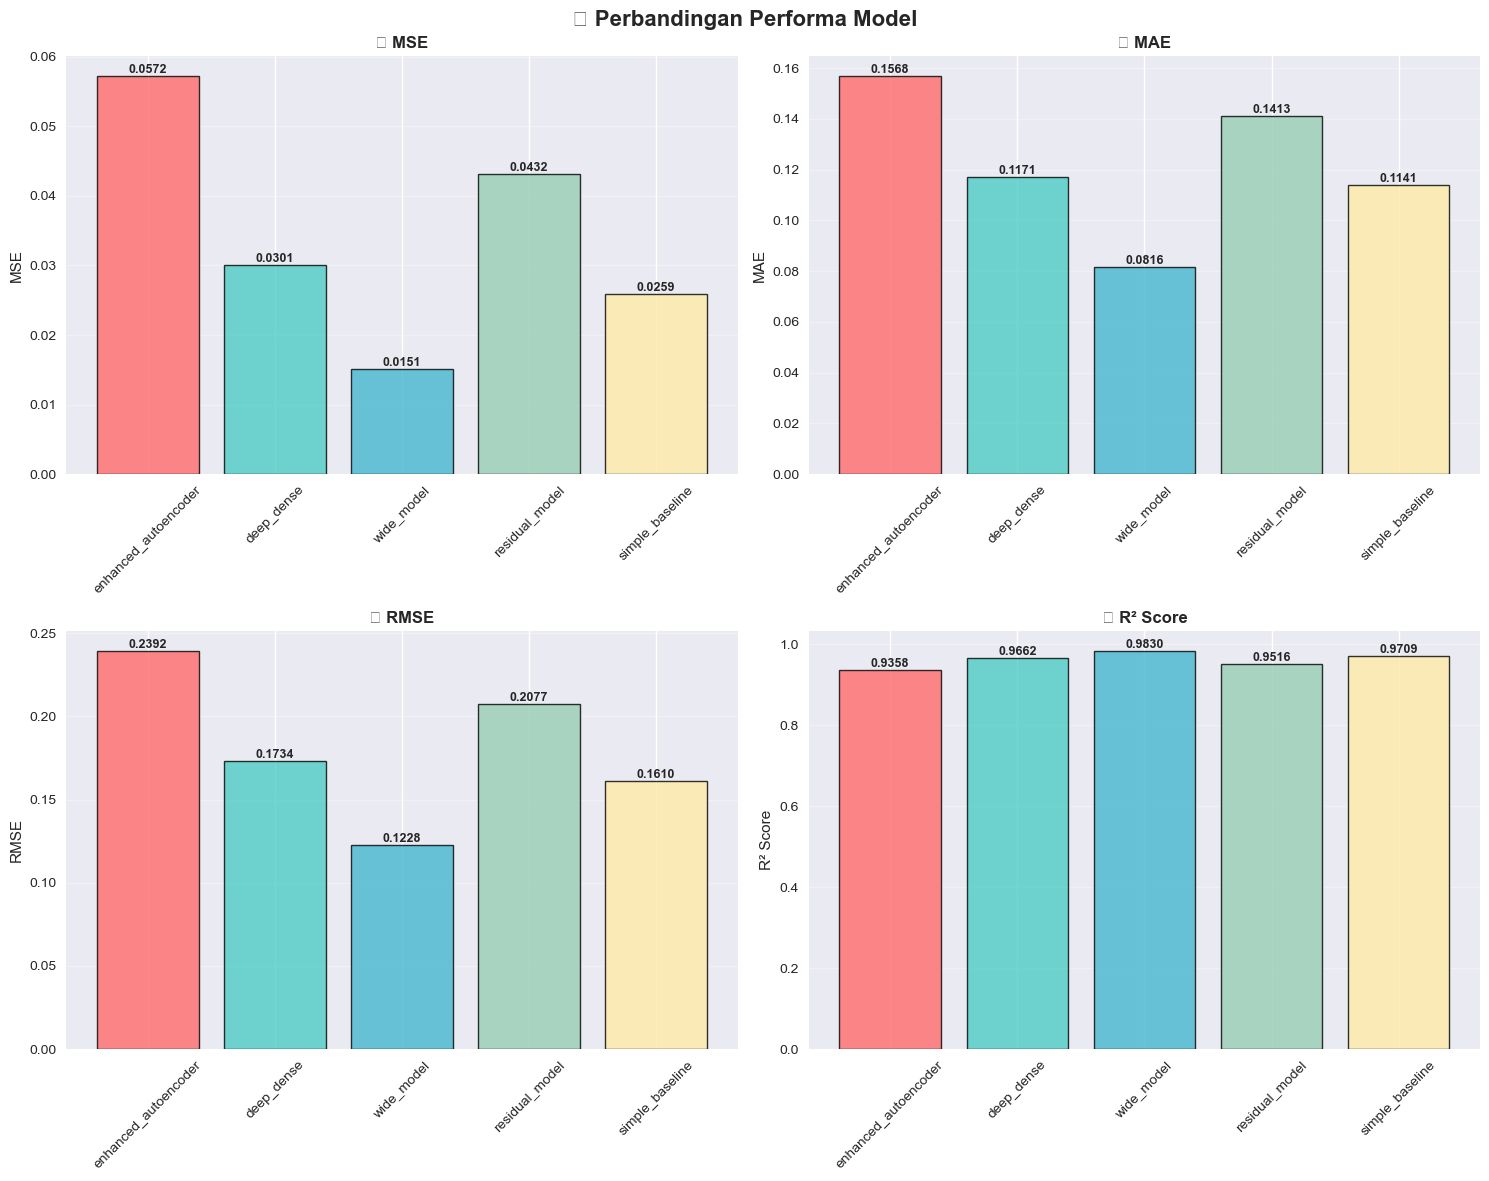


🥇 MODEL TERBAIK: wide_model
   R² Score: 0.9830
   MSE: 0.0151
   MAE: 0.0816
 Membuat dashboard performa model...


 Performance dashboard berhasil dibuat!

🔍 3. Membuat Feature Analysis...
Menganalisis pentingnya fitur...


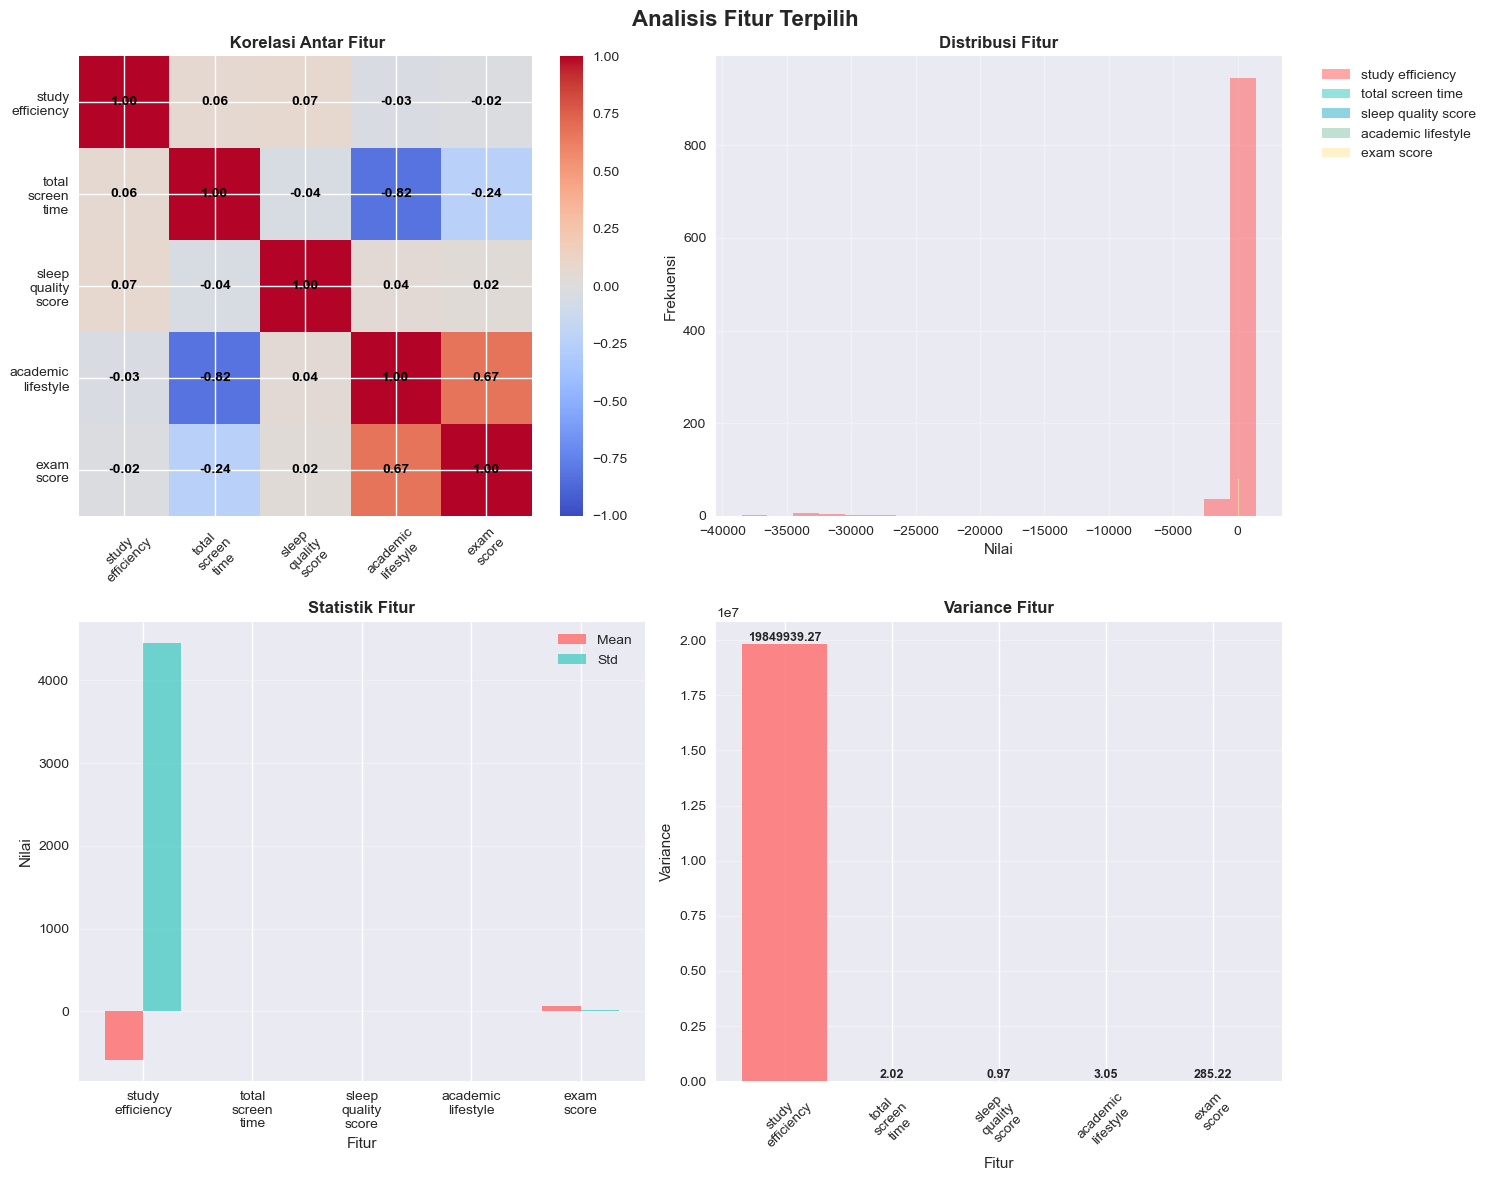

Feature importance analysis selesai!

🎯 4. Membuat Predictions vs Actual...
📈 Menganalisis model terbaik: wide_model
 Membuat plot prediksi vs actual untuk wide_model...


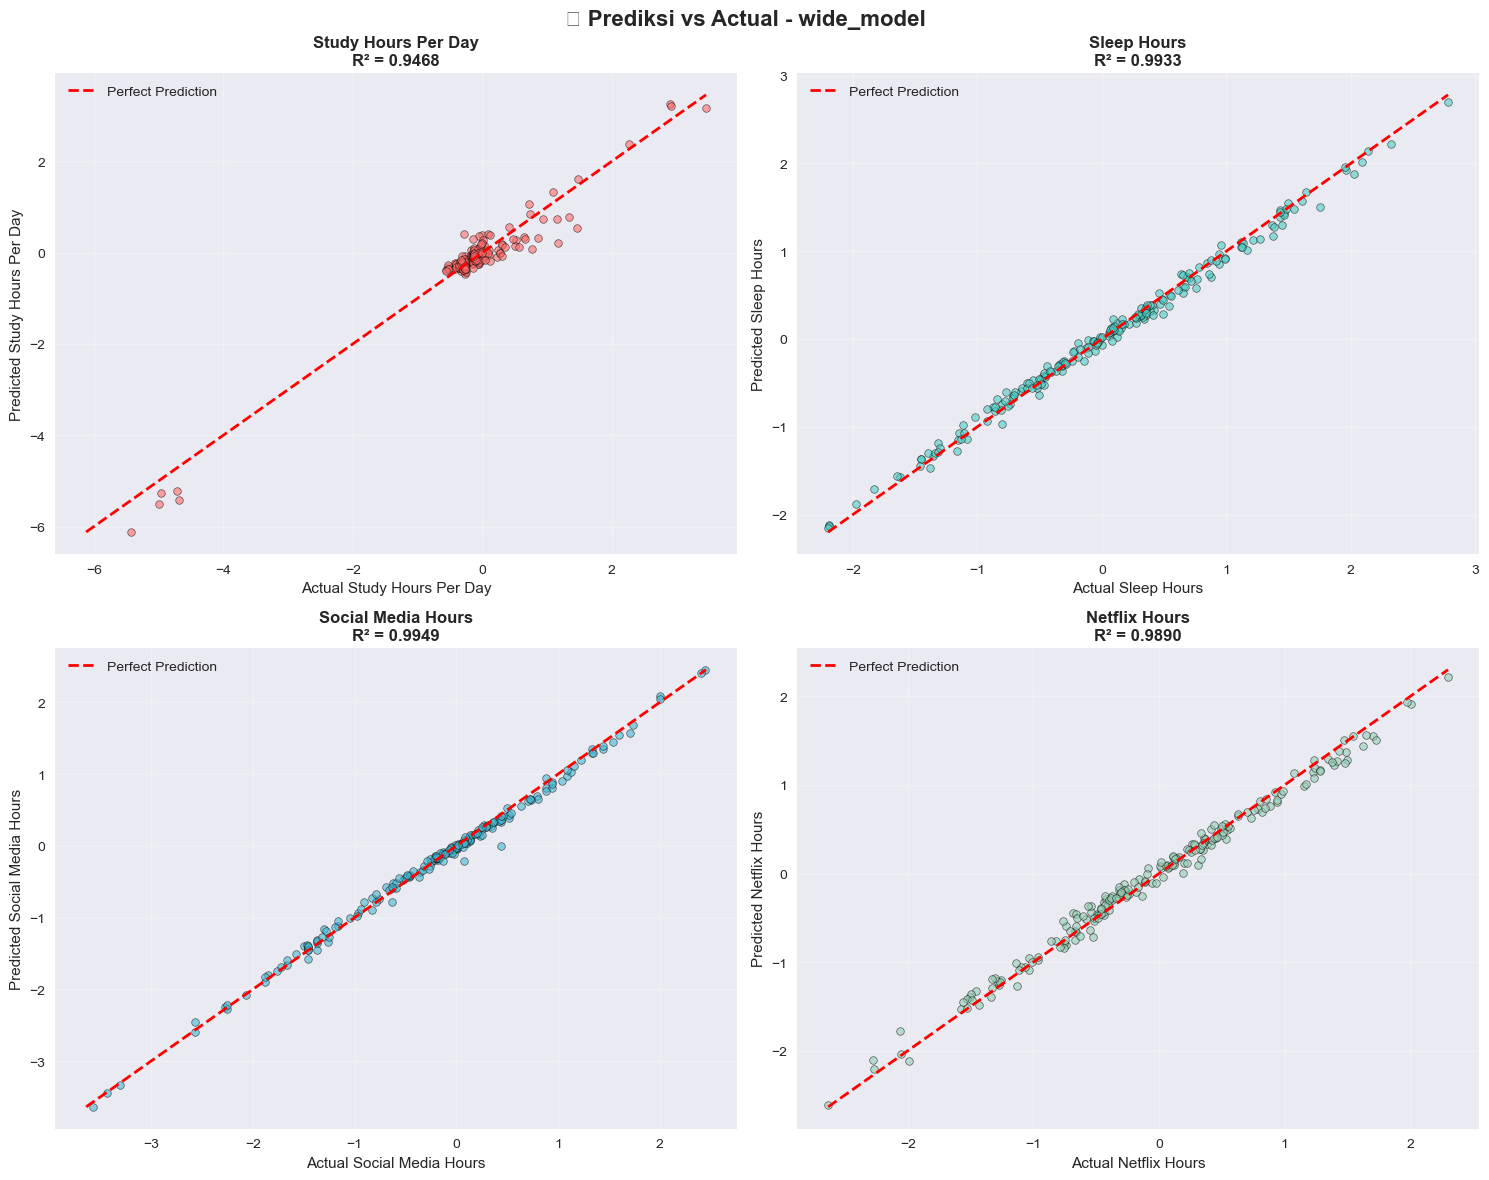

Predictions vs actual plot selesai!
 Membuat 3D predictions plot untuk wide_model...


3D predictions plot berhasil dibuat!

📋 5. Membuat Summary Report...

📋 LAPORAN RINGKASAN TRAINING

🥇 MODEL TERBAIK: wide_model
   📊 R² Score: 0.9830 (98.3%)
   📉 MSE: 0.015072
   📈 MAE: 0.081608

🏆 RANKING SEMUA MODEL:
   1. wide_model: R² = 0.9830
   2. simple_baseline: R² = 0.9709
   3. deep_dense: R² = 0.9662
   4. residual_model: R² = 0.9516
   5. enhanced_autoencoder: R² = 0.9358

🔍 FITUR YANG DIGUNAKAN:
   1. Study Efficiency
   2. Total Screen Time
   3. Sleep Quality Score
   4. Academic Lifestyle
   5. Exam Score

💡 REKOMENDASI:
   ✅ Model memiliki performa sangat baik!
   🚀 Siap untuk deployment

📊 PERFORMA PER TARGET:
   📚 Study Hours Per Day: R² = 0.9468
   📚 Sleep Hours: R² = 0.9933
   📚 Social Media Hours: R² = 0.9949
   📚 Netflix Hours: R² = 0.9890

🎉 SEMUA VISUALISASI SELESAI!
✅ Cek semua plot yang sudah dibuat di atas


In [40]:
quick_visualize()

## Inference

In [41]:
class SimplifiedHabitPredictor:
    """
    habit predictor
    """

    def __init__(self, feature_model, feature_names):
        self.feature_model = feature_model
        self.feature_names = feature_names
        self.habit_rules = self.create_habit_rules()

    def create_habit_rules(self):
        """

        """
        rules = {
            'study_hours_per_day': {
                'base': 4.0,
                'factors': {
                    'exam_score': {'weight': 0.05, 'optimal': 80},
                    'attendance_percentage': {'weight': 0.03, 'optimal': 90},
                    'mental_health_rating': {'weight': 0.2, 'optimal': 8},
                    'academic_lifestyle': {'weight': 0.3, 'optimal': 2}
                }
            },
            'sleep_hours': {
                'base': 7.5,
                'factors': {
                    'mental_health_rating': {'weight': 0.2, 'optimal': 8},
                    'exercise_frequency': {'weight': 0.1, 'optimal': 3},
                    'age': {'weight': -0.1, 'optimal': 20}
                }
            },
            'social_media_hours': {
                'base': 2.0,
                'factors': {
                    'total_screen_time': {'weight': 0.4, 'optimal': 3},
                    'mental_health_rating': {'weight': -0.1, 'optimal': 8},
                    'academic_lifestyle': {'weight': -0.2, 'optimal': 2}
                }
            },
            'netflix_hours': {
                'base': 1.5,
                'factors': {
                    'total_screen_time': {'weight': 0.3, 'optimal': 3},
                    'study_efficiency': {'weight': -0.05, 'optimal': 20},
                    'mental_health_rating': {'weight': 0.1, 'optimal': 7}
                }
            }
        }
        return rules

    def predict_habits_rule_based(self, user_input):
        """
        Predict habits
        """
        predictions = {}
        confidence_scores = {}

        for habit_name, rules in self.habit_rules.items():
            base_value = rules['base']
            adjustment = 0

            for feature, params in rules['factors'].items():
                if feature in user_input:
                    user_value = user_input[feature]
                    optimal_value = params['optimal']
                    weight = params['weight']


                    if optimal_value != 0:
                        deviation = (user_value - optimal_value) / optimal_value
                    else:
                        deviation = user_value - optimal_value

                    adjustment += weight * deviation

            # Apply adjustment dengan bounds
            predicted_value = base_value + adjustment

            # Apply realistic bounds
            if habit_name == 'study_hours_per_day':
                predicted_value = max(1, min(12, predicted_value))
            elif habit_name == 'sleep_hours':
                predicted_value = max(6, min(10, predicted_value))
            elif habit_name in ['social_media_hours', 'netflix_hours']:
                predicted_value = max(0.5, min(4, predicted_value))

            predictions[habit_name] = predicted_value
            confidence_scores[habit_name] = 0.8

        return predictions, confidence_scores

    def generate_recommendations(self, predictions, user_input):
        """
        Generate habit recommendations
        """
        recommendations = {}

        # Study hours recommendation
        study_hours = predictions['study_hours_per_day']
        if study_hours < 3:
            study_advice = "Tingkatkan waktu belajar secara bertahap untuk hasil akademik yang lebih baik"
        elif study_hours > 8:
            study_advice = "Pertimbangkan untuk mengoptimalkan efisiensi belajar"
        else:
            study_advice = "Waktu belajar sudah dalam range optimal"

        recommendations['study_hours'] = {
            'recommended_hours': round(study_hours, 1),
            'advice': study_advice
        }

        # Sleep hours recommendation
        sleep_hours = predictions['sleep_hours']
        if sleep_hours < 7:
            sleep_advice = "Tidur kurang dapat mengganggu konsentrasi. Usahakan 7-8 jam"
        elif sleep_hours > 9:
            sleep_advice = "Tidur berlebihan dapat mengurangi produktivitas harian"
        else:
            sleep_advice = "Durasi tidur sudah optimal"

        recommendations['sleep_hours'] = {
            'recommended_hours': round(sleep_hours, 1),
            'advice': sleep_advice
        }

        # Social media recommendation
        social_hours = predictions['social_media_hours']
        if social_hours > 3:
            social_advice = "Batasi penggunaan media sosial untuk menghindari distraksi"
        elif social_hours < 1:
            social_advice = "Sedikit interaksi sosial digital dapat membantu relaksasi"
        else:
            social_advice = "Penggunaan media sosial dalam batas wajar"

        recommendations['social_media_hours'] = {
            'recommended_hours': round(social_hours, 1),
            'advice': social_advice
        }

        # Entertainment recommendation
        netflix_hours = predictions['netflix_hours']
        if netflix_hours > 2:
            netflix_advice = "Batasi waktu hiburan untuk menjaga keseimbangan akademik"
        elif netflix_hours < 1:
            netflix_advice = "Sedikit waktu hiburan dapat membantu mengurangi stress"
        else:
            netflix_advice = "Waktu hiburan sudah seimbang"

        recommendations['entertainment_hours'] = {
            'recommended_hours': round(netflix_hours, 1),
            'advice': netflix_advice
        }

        return recommendations

    def display_recommendations(self, user_input, recommendations):
        """
        Display recommendations
        """
        print(f"\nREKOMENDASI HABIT UNTUK MAHASISWA")
        print("=" * 45)

        print(f"\n REKOMENDASI HABIT HARIAN:")
        print("-" * 30)

        for habit_type, data in recommendations.items():
            icon = {"study_hours": "📚", "sleep_hours": "😴",
                   "social_media_hours": "📱", "entertainment_hours": "🎬"}

            habit_name = habit_type.replace('_', ' ').title()
            print(f"\n{icon.get(habit_type, '•')} {habit_name}: {data['recommended_hours']} jam/hari")
            print(f"   Saran: {data['advice']}")

        # Summary
        total_hours = sum(data['recommended_hours'] for data in recommendations.values())
        free_time = 24 - total_hours

        print(f"\n RINGKASAN JADWAL:")
        print(f"   Total waktu terstruktur: {total_hours:.1f} jam")
        print(f"   Waktu bebas tersisa: {free_time:.1f} jam")

    def create_daily_schedule(self, recommendations):
        """
        Create sample daily schedule
        """
        study_hours = recommendations['study_hours']['recommended_hours']
        sleep_hours = recommendations['sleep_hours']['recommended_hours']
        social_hours = recommendations['social_media_hours']['recommended_hours']
        entertainment_hours = recommendations['entertainment_hours']['recommended_hours']

if 'best_model' in locals() and best_model is not None:
    simplified_predictor = SimplifiedHabitPredictor(
        feature_model=best_model,
        feature_names=fiturfix
    )
    print(" Habit Predictor created with neural network model")
else:
    class DummyModel:
        def predict(self, x, verbose=0):
            return x

    simplified_predictor = SimplifiedHabitPredictor(
        feature_model=DummyModel(),
        feature_names=fiturfix
    )

 Habit Predictor created with neural network model


In [42]:
def create_demo_profiles():

    """
    Create demo profiles untuk testing
    """
    profiles = {
        'mahasiswa_berprestasi': {
            'age': 20,
            'gender_encoded': 1,
            'part_time_job_encoded': 0,
            'attendance_percentage': 95,
            'diet_quality_encoded': 2,
            'exercise_frequency': 4,
            'parental_education_level_encoded': 3,
            'internet_quality_encoded': 2,
            'mental_health_rating': 8.5,
            'extracurricular_participation_encoded': 1,
            'exam_score': 88,
            'total_screen_time': 2.5,
            'study_efficiency': 22,
            'sleep_quality_score': 68,
            'academic_lifestyle': 3.5
        },
        'mahasiswa_kesulitan': {
            'age': 19,
            'gender_encoded': 0,
            'part_time_job_encoded': 1,
            'attendance_percentage': 60,
            'diet_quality_encoded': 0,
            'exercise_frequency': 1,
            'parental_education_level_encoded': 1,
            'internet_quality_encoded': 1,
            'mental_health_rating': 5,
            'extracurricular_participation_encoded': 0,
            'exam_score': 55,
            'total_screen_time': 6,
            'study_efficiency': 8,
            'sleep_quality_score': 30,
            'academic_lifestyle': -3
        },
        'mahasiswa_seimbang': {
            'age': 21,
            'gender_encoded': 1,
            'part_time_job_encoded': 0,
            'attendance_percentage': 85,
            'diet_quality_encoded': 1,
            'exercise_frequency': 3,
            'parental_education_level_encoded': 2,
            'internet_quality_encoded': 2,
            'mental_health_rating': 7,
            'extracurricular_participation_encoded': 1,
            'exam_score': 75,
            'total_screen_time': 3.5,
            'study_efficiency': 16,
            'sleep_quality_score': 56,
            'academic_lifestyle': 1.5
        }
    }
    return profiles

In [43]:
def run_comprehensive_demo():
    """
    """
    print("DEMO")
    print("=" * 55)

    profiles = create_demo_profiles()

    for profile_name, user_data in profiles.items():
        print(f"\n" + "="*60)
        print(f"PROFILE: {profile_name.replace('_', ' ').upper()}")
        print("="*60)

        # Display profile info
        print(f"\nPROFIL MAHASISWA:")
        key_info = {
            'Usia': user_data['age'],
            'Gender': 'Laki-laki' if user_data['gender_encoded'] == 1 else 'Perempuan',
            'Kerja Part-time': 'Ya' if user_data['part_time_job_encoded'] == 1 else 'Tidak',
            'Kehadiran Kuliah': f"{user_data['attendance_percentage']}%",
            'Nilai Ujian': user_data['exam_score'],
            'Kesehatan Mental (1-10)': user_data['mental_health_rating'],
            'Olahraga per Minggu': f"{user_data['exercise_frequency']}x"
        }

        for key, value in key_info.items():
            print(f"   • {key}: {value}")

        try:
            predictions, confidence_scores = simplified_predictor.predict_habits_rule_based(user_data)

            recommendations = simplified_predictor.generate_recommendations(predictions, user_data)

            simplified_predictor.display_recommendations(user_data, recommendations)

            simplified_predictor.create_daily_schedule(recommendations)

            print(f"\nANALISIS HABIT:")
            total_productive = recommendations['study_hours']['recommended_hours']
            total_leisure = (recommendations['social_media_hours']['recommended_hours'] +
                           recommendations['entertainment_hours']['recommended_hours'])

            productive_ratio = total_productive / (total_productive + total_leisure)

            if productive_ratio > 0.7:
                status = "Sangat Produktif "
            elif productive_ratio > 0.5:
                status = "Cukup Seimbang "
            else:
                status = "Perlu Perbaikan "

            print(f"   Status: {status}")
            print(f"   Rasio Produktivitas: {productive_ratio:.1%}")

        except Exception as e:
            print(f"Error processing {profile_name}: {str(e)}")
            continue

        input("\nTekan Enter untuk lanjut...")

In [44]:
def get_user_input():
    """
    Get user input
    """
    print(f"\nINPUT DATA MAHASISWA CUSTOM")
    print("=" * 40)
    print("Masukkan data berikut (tekan Enter untuk nilai default):")

    user_data = {}

    age = input("Usia (18-25) [20]: ").strip()
    user_data['age'] = float(age) if age else 20.0

    gender = input("Gender (0=Perempuan, 1=Laki-laki) [0]: ").strip()
    user_data['gender_encoded'] = int(gender) if gender else 0

    job = input("Kerja part-time (0=Tidak, 1=Ya) [0]: ").strip()
    user_data['part_time_job_encoded'] = int(job) if job else 0

    attendance = input("Kehadiran kuliah % (0-100) [80]: ").strip()
    user_data['attendance_percentage'] = float(attendance) if attendance else 80.0

    diet = input("Kualitas diet (0=Buruk, 1=Cukup, 2=Baik) [1]: ").strip()
    user_data['diet_quality_encoded'] = int(diet) if diet else 1

    exercise = input("Olahraga per minggu (0-7) [2]: ").strip()
    user_data['exercise_frequency'] = float(exercise) if exercise else 2.0

    parent_edu = input("Pendidikan ortu (0=SMA, 1=Diploma, 2=S1, 3=S2+) [2]: ").strip()
    user_data['parental_education_level_encoded'] = int(parent_edu) if parent_edu else 2

    internet = input("Kualitas internet (0=Buruk, 1=Cukup, 2=Baik) [1]: ").strip()
    user_data['internet_quality_encoded'] = int(internet) if internet else 1

    mental = input("Kesehatan mental 1-10 [7]: ").strip()
    user_data['mental_health_rating'] = float(mental) if mental else 7.0

    extra = input("Ikut ekstrakurikuler (0=Tidak, 1=Ya) [0]: ").strip()
    user_data['extracurricular_participation_encoded'] = int(extra) if extra else 0

    exam = input("Rata-rata nilai ujian (0-100) [75]: ").strip()
    user_data['exam_score'] = float(exam) if exam else 75.0

    social_media = input("Jam media sosial per hari [2]: ").strip()
    social_media = float(social_media) if social_media else 2.0

    netflix = input("Jam hiburan per hari [1.5]: ").strip()
    netflix = float(netflix) if netflix else 1.5

    study_current = input("Jam belajar saat ini per hari [4]: ").strip()
    study_current = float(study_current) if study_current else 4.0

    user_data['total_screen_time'] = social_media + netflix
    user_data['study_efficiency'] = user_data['exam_score'] / (study_current + 0.1) * 0.25
    user_data['sleep_quality_score'] = user_data['mental_health_rating'] * 7.5
    user_data['academic_lifestyle'] = study_current - user_data['total_screen_time']

    return user_data

In [45]:
def main_demo():
    """
    Main demo function dengan menu
    """
    while True:
        print(f"\nSISTEM REKOMENDASI HABIT MAHASISWA")
        print("=" * 45)
        print("Pilihan:")
        print("1. Demo dengan profil contoh")
        print("2. Input data mahasiswa custom")
        print("3. Info tentang sistem")
        print("4. Exit")

        choice = input("\nPilih opsi (1-4): ").strip()

        if choice == '1':
            run_comprehensive_demo()

        elif choice == '2':
            try:
                print(f"\n" + "="*50)
                print("INPUT DATA CUSTOM")
                print("="*50)

                user_data = get_user_input()

                # Process prediction
                predictions, confidence_scores = simplified_predictor.predict_habits_rule_based(user_data)
                recommendations = simplified_predictor.generate_recommendations(predictions, user_data)

                # Display results
                print(f"\n" + "="*50)
                print("HASIL REKOMENDASI CUSTOM")
                print("="*50)

                simplified_predictor.display_recommendations(user_data, recommendations)
                simplified_predictor.create_daily_schedule(recommendations)

                # Additional insights
                print(f"\n INSIGHT TAMBAHAN:")
                study_hours = recommendations['study_hours']['recommended_hours']
                sleep_hours = recommendations['sleep_hours']['recommended_hours']
                screen_time = (recommendations['social_media_hours']['recommended_hours'] +
                              recommendations['entertainment_hours']['recommended_hours'])

                print(f"   • Fokus utama: {'Akademik' if study_hours > screen_time else 'Work-life balance'}")
                print(f"   • Prioritas kesehatan: {'Baik' if sleep_hours >= 7 else 'Perlu perbaikan'}")
                print(f"   • Digital wellness: {'Terkontrol' if screen_time <= 3 else 'Perlu dibatasi'}")

            except Exception as e:
                print(f"❌ Error: {str(e)}")

        elif choice == '3':
            print(f"\nINFO SISTEM REKOMENDASI HABIT")
            print("=" * 40)
            print("Sistem ini menggunakan:")
            print("• Machine learning untuk feature selection & habit prediction")

            for i, feature in enumerate(fiturfix, 1):
                print(f"  {i}. {feature.replace('_', ' ').title()}")

            print(f"\nOutput sistem:")
            print("• Rekomendasi jam belajar per hari")
            print("• Rekomendasi jam tidur per hari")
            print("• Rekomendasi jam media sosial per hari")
            print("• Rekomendasi jam hiburan per hari")
            print("• Contoh jadwal harian optimal")
            print("• Analisis keseimbangan hidup")

            if 'evaluation_results' in locals() and evaluation_results:
                print(f"\nPerforma model:")
                best_r2 = max(result['overall_r2'] for result in evaluation_results.values())
                print(f"• Akurasi prediksi (R²): {best_r2:.1%}")
                print(f"• Model terbaik: {best_model_name if 'best_model_name' in locals() else 'Rule-based'}")

        elif choice == '4':
            print("\nTerima kasih telah menggunakan Sistem Rekomendasi Habit!")
            print("Semoga rekomendasi ini membantu meningkatkan produktivitas dan well-being Anda!")
            break

        else:
            print("Pilihan tidak valid. Silakan pilih 1-4.")

In [49]:
# Start main demo
main_demo()


SISTEM REKOMENDASI HABIT MAHASISWA
Pilihan:
1. Demo dengan profil contoh
2. Input data mahasiswa custom
3. Info tentang sistem
4. Exit

INPUT DATA CUSTOM

INPUT DATA MAHASISWA CUSTOM
Masukkan data berikut (tekan Enter untuk nilai default):

HASIL REKOMENDASI CUSTOM

REKOMENDASI HABIT UNTUK MAHASISWA

 REKOMENDASI HABIT HARIAN:
------------------------------

📚 Study Hours: 3.7 jam/hari
   Saran: Waktu belajar sudah dalam range optimal

😴 Sleep Hours: 7.4 jam/hari
   Saran: Durasi tidur sudah optimal

📱 Social Media Hours: 2.2 jam/hari
   Saran: Penggunaan media sosial dalam batas wajar

🎬 Entertainment Hours: 1.6 jam/hari
   Saran: Waktu hiburan sudah seimbang

 RINGKASAN JADWAL:
   Total waktu terstruktur: 14.9 jam
   Waktu bebas tersisa: 9.1 jam

 INSIGHT TAMBAHAN:
   • Fokus utama: Work-life balance
   • Prioritas kesehatan: Baik
   • Digital wellness: Perlu dibatasi

SISTEM REKOMENDASI HABIT MAHASISWA
Pilihan:
1. Demo dengan profil contoh
2. Input data mahasiswa custom
3. Info ten

In [ ]:
from flask import Flask, request, jsonify
from flask_cors import CORS
import os
import sys
import json
import pickle
import numpy as np
from datetime import datetime
import traceback

try:
    from simple_model_loader import SimpleModelLoader, load_latest_model_simple
    ModelLoader = SimpleModelLoader
    load_latest_model = load_latest_model_simple
except ImportError:
    try:
        from model_loader import ModelLoader, load_latest_model
    except ImportError:

        # Buat dummy loader sebagai fallback
        class DummyLoader:
            def __init__(self):
                self.features = [
                    'age', 'gender_encoded', 'part_time_job_encoded', 
                    'attendance_percentage', 'diet_quality_encoded',
                    'exercise_frequency', 'parental_education_level_encoded',
                    'internet_quality_encoded', 'mental_health_rating',
                    'extracurricular_participation_encoded', 'exam_score',
                    'total_screen_time', 'study_efficiency', 
                    'sleep_quality_score', 'academic_lifestyle'
                ]
                
            def predict(self, user_input, use_neural=True):
                # Rule-based prediction sebagai fallback
                predictions = {
                    'study_hours_per_day': max(2, min(8, user_input.get('exam_score', 75) / 20)),
                    'sleep_hours': max(6, min(9, 8 - user_input.get('mental_health_rating', 7) * 0.1)),
                    'social_media_hours': max(1, min(4, user_input.get('age', 20) * 0.15)),
                    'netflix_hours': max(0.5, min(3, 2.5 - user_input.get('exam_score', 75) * 0.02))
                }
                return predictions, "rule_based_fallback"
            
            def generate_recommendations(self, predictions):
                recommendations = {}
                for habit, hours in predictions.items():
                    if 'study' in habit:
                        advice = "Waktu belajar sudah optimal" if 3 <= hours <= 6 else "Perlu penyesuaian"
                        recommendations['study_hours'] = {'recommended_hours': round(hours, 1), 'advice': advice}
                    elif 'sleep' in habit:
                        advice = "Durasi tidur optimal" if 7 <= hours <= 8 else "Perlu penyesuaian"
                        recommendations['sleep_hours'] = {'recommended_hours': round(hours, 1), 'advice': advice}
                    elif 'social_media' in habit:
                        advice = "Penggunaan wajar" if hours <= 3 else "Batasi penggunaan"
                        recommendations['social_media_hours'] = {'recommended_hours': round(hours, 1), 'advice': advice}
                    elif 'netflix' in habit:
                        advice = "Waktu hiburan seimbang" if hours <= 2 else "Batasi hiburan"
                        recommendations['entertainment_hours'] = {'recommended_hours': round(hours, 1), 'advice': advice}
                return recommendations
            
            def get_model_info(self):
                return {
                    "model_name": "fallback_model",
                    "loader_type": "DummyLoader",
                    "features": self.features,
                    "status": "Menggunakan rule-based fallback"
                }
        
        ModelLoader = DummyLoader
        load_latest_model = lambda: DummyLoader()

# Inisialisasi Flask app
app = Flask(__name__)
CORS(app)  # Enable CORS untuk akses dari frontend

# Global variable untuk model
model_loader = None

def initialize_model():
    """
    Inisialisasi model saat aplikasi startup
    """
    global model_loader
    try:
        print("🔄 Menginisialisasi model...")
        
        model_loader = load_latest_model()
        if model_loader:
            print("Model berhasil diinisialisasi")
            return True
        else:
            print("Gagal menginisialisasi model")
            return False
    except Exception as e:
        print(f"Error inisialisasi model: {str(e)}")
        # Gunakan dummy loader sebagai fallback
        try:
            model_loader = ModelLoader()
            print("Menggunakan fallback model")
            return True
        except:
            return False

@app.route('/', methods=['GET'])
def home():
    """
    Endpoint home untuk cek status API
    """
    return jsonify({
        "message": "🎓 API Prediksi Kebiasaan Mahasiswa",
        "version": "1.0.0",
        "status": "running",
        "model_loaded": model_loader is not None,
        "timestamp": datetime.now().isoformat(),
        "endpoints": {
            "GET /": "Status API",
            "GET /model/info": "Informasi model",
            "POST /predict": "Prediksi single mahasiswa",
            "POST /predict/batch": "Prediksi batch mahasiswa",
            "POST /validate/input": "Validasi data input",
            "GET /examples": "Contoh data input",
            "GET /health": "Health check"
        }
    })

@app.route('/model/info', methods=['GET'])
def model_info():
    """
    Endpoint untuk mendapatkan informasi model
    """
    try:
        if model_loader is None:
            return jsonify({
                "error": "Model belum diinisialisasi",
                "status": "error"
            }), 500
        
        info = model_loader.get_model_info()
        return jsonify({
            "status": "success",
            "model_info": info
        })
        
    except Exception as e:
        return jsonify({
            "error": str(e),
            "status": "error"
        }), 500

@app.route('/predict', methods=['POST'])
def predict():
    """
    Endpoint utama untuk prediksi kebiasaan mahasiswa
    """
    try:
        if model_loader is None:
            return jsonify({
                "error": "Model belum diinisialisasi. Pastikan model sudah disimpan di folder saved_models/",
                "status": "error"
            }), 500
        
        # Ambil data dari request
        data = request.get_json()
        
        if not data:
            return jsonify({
                "error": "Data input tidak valid. Pastikan mengirim JSON data.",
                "status": "error",
                "required_fields": getattr(model_loader, 'features', []) if hasattr(model_loader, 'features') else []
            }), 400
        
        # Validasi input dasar
        required_basic_fields = ['age', 'gender_encoded', 'attendance_percentage', 'mental_health_rating', 'exam_score']
        missing_basic = [field for field in required_basic_fields if field not in data]
        
        if missing_basic:
            return jsonify({
                "error": f"Field dasar yang wajib: {missing_basic}",
                "status": "error",
                "hint": "Minimal berikan: age, gender_encoded, attendance_percentage, mental_health_rating, exam_score"
            }), 400
        
        # Set default values untuk field yang hilang
        default_values = {
            'part_time_job_encoded': 0,
            'diet_quality_encoded': 1,
            'exercise_frequency': 2,
            'parental_education_level_encoded': 2,
            'internet_quality_encoded': 1,
            'extracurricular_participation_encoded': 0,
            'total_screen_time': 3.0,
            'study_efficiency': data.get('exam_score', 75) / 5,
            'sleep_quality_score': data.get('mental_health_rating', 7) * 8,
            'academic_lifestyle': 1.0
        }
        
        # Fill missing values
        for field, default_val in default_values.items():
            if field not in data:
                data[field] = default_val
        
        # Prediksi
        predictions, method = model_loader.predict(data, use_neural=True)
        
        if predictions is None:
            return jsonify({
                "error": "Prediksi gagal. Silakan cek data input.",
                "status": "error"
            }), 500
        
        # Generate rekomendasi
        recommendations = model_loader.generate_recommendations(predictions)
        
        # Hitung insight tambahan
        study_hours = recommendations.get('study_hours', {}).get('recommended_hours', 4)
        social_hours = recommendations.get('social_media_hours', {}).get('recommended_hours', 2)
        entertainment_hours = recommendations.get('entertainment_hours', {}).get('recommended_hours', 1.5)
        
        total_productive = study_hours
        total_leisure = social_hours + entertainment_hours
        productive_ratio = total_productive / (total_productive + total_leisure) if (total_productive + total_leisure) > 0 else 0
        
        # Status berdasarkan produktivitas
        if productive_ratio > 0.7:
            productivity_status = "Sangat Produktif "
        elif productive_ratio > 0.5:
            productivity_status = "Cukup Seimbang "
        else:
            productivity_status = "Perlu Perbaikan"
        
        # Response
        response = {
            "status": "success",
            "prediction_method": method,
            "predictions": predictions,
            "recommendations": recommendations,
            "insights": {
                "productivity_ratio": round(productive_ratio, 3),
                "productivity_status": productivity_status,
                "total_productive_hours": round(total_productive, 1),
                "total_leisure_hours": round(total_leisure, 1),
                "work_life_balance": "Baik" if 0.4 <= productive_ratio <= 0.7 else "Perlu Penyesuaian",
                "daily_schedule_filled": round((total_productive + total_leisure) / 24 * 100, 1)
            },
            "input_data": data,
            "timestamp": datetime.now().isoformat()
        }
        
        return jsonify(response)
        
    except Exception as e:
        error_trace = traceback.format_exc()
        print(f"Error dalam prediksi: {error_trace}")
        
        return jsonify({
            "error": str(e),
            "status": "error",
            "trace": error_trace if app.debug else None
        }), 500

@app.route('/predict/batch', methods=['POST'])
def predict_batch():
    """
    Endpoint untuk prediksi batch (multiple mahasiswa)
    """
    try:
        if model_loader is None:
            return jsonify({
                "error": "Model belum diinisialisasi",
                "status": "error"
            }), 500
        
        data = request.get_json()
        
        if not data or 'students' not in data:
            return jsonify({
                "error": "Format data tidak valid. Expected: {'students': [student_data1, student_data2, ...]}",
                "status": "error"
            }), 400
        
        students_data = data['students']
        
        if not isinstance(students_data, list):
            return jsonify({
                "error": "Data students harus berupa list",
                "status": "error"
            }), 400
        
        if len(students_data) > 50:  # Limit batch size
            return jsonify({
                "error": "Maksimal 50 mahasiswa per batch",
                "status": "error"
            }), 400
        
        results = []
        errors = []
        
        for i, student_data in enumerate(students_data):
            try:
                # Set default values
                default_values = {
                    'part_time_job_encoded': 0,
                    'diet_quality_encoded': 1,
                    'exercise_frequency': 2,
                    'parental_education_level_encoded': 2,
                    'internet_quality_encoded': 1,
                    'extracurricular_participation_encoded': 0,
                    'total_screen_time': 3.0,
                    'study_efficiency': student_data.get('exam_score', 75) / 5,
                    'sleep_quality_score': student_data.get('mental_health_rating', 7) * 8,
                    'academic_lifestyle': 1.0
                }
                
                for field, default_val in default_values.items():
                    if field not in student_data:
                        student_data[field] = default_val
                
                predictions, method = model_loader.predict(student_data, use_neural=True)
                
                if predictions is None:
                    errors.append({
                        "student_index": i,
                        "error": "Prediksi gagal untuk student ini"
                    })
                    continue
                
                recommendations = model_loader.generate_recommendations(predictions)
                
                # Hitung insight
                study_hours = recommendations.get('study_hours', {}).get('recommended_hours', 4)
                social_hours = recommendations.get('social_media_hours', {}).get('recommended_hours', 2)
                entertainment_hours = recommendations.get('entertainment_hours', {}).get('recommended_hours', 1.5)
                
                total_productive = study_hours
                total_leisure = social_hours + entertainment_hours
                productive_ratio = total_productive / (total_productive + total_leisure) if (total_productive + total_leisure) > 0 else 0
                
                student_result = {
                    "student_index": i,
                    "student_id": student_data.get('student_id', f'student_{i+1}'),
                    "predictions": predictions,
                    "recommendations": recommendations,
                    "insights": {
                        "productivity_ratio": round(productive_ratio, 3),
                        "productivity_status": "Sangat Produktif " if productive_ratio > 0.7 
                                            else "Cukup Seimbang " if productive_ratio > 0.5 
                                            else "Perlu Perbaikan "
                    },
                    "input_data": student_data
                }
                
                results.append(student_result)
                
            except Exception as e:
                errors.append({
                    "student_index": i,
                    "error": str(e)
                })
        
        # Summary statistics
        if results:
            productivity_stats = [r['insights']['productivity_ratio'] for r in results]
            avg_productivity = sum(productivity_stats) / len(productivity_stats)
            
            avg_study_hours = sum([r['predictions']['study_hours_per_day'] for r in results]) / len(results)
            avg_sleep_hours = sum([r['predictions']['sleep_hours'] for r in results]) / len(results)
        else:
            avg_productivity = 0
            avg_study_hours = 0
            avg_sleep_hours = 0
        
        return jsonify({
            "status": "success",
            "total_students": len(students_data),
            "successful_predictions": len(results),
            "failed_predictions": len(errors),
            "summary_statistics": {
                "average_productivity_ratio": round(avg_productivity, 3),
                "average_study_hours": round(avg_study_hours, 1),
                "average_sleep_hours": round(avg_sleep_hours, 1)
            },
            "results": results,
            "errors": errors if errors else None,
            "timestamp": datetime.now().isoformat()
        })
        
    except Exception as e:
        return jsonify({
            "error": str(e),
            "status": "error"
        }), 500

@app.route('/validate/input', methods=['POST'])
def validate_input():
    """
    Endpoint untuk validasi data input sebelum prediksi
    """
    try:
        if model_loader is None:
            return jsonify({
                "error": "Model belum diinisialisasi",
                "status": "error"
            }), 500
        
        data = request.get_json()
        
        if not data:
            return jsonify({
                "error": "Data input tidak valid",
                "status": "error"
            }), 400
        
        # Required fields
        required_fields = getattr(model_loader, 'features', [
            'age', 'gender_encoded', 'part_time_job_encoded', 
            'attendance_percentage', 'diet_quality_encoded',
            'exercise_frequency', 'parental_education_level_encoded',
            'internet_quality_encoded', 'mental_health_rating',
            'extracurricular_participation_encoded', 'exam_score',
            'total_screen_time', 'study_efficiency', 
            'sleep_quality_score', 'academic_lifestyle'
        ])
        
        validation_result = {
            "status": "success",
            "input_valid": True,
            "required_fields": required_fields,
            "provided_fields": list(data.keys()),
            "missing_fields": [],
            "invalid_fields": [],
            "field_validation": {}
        }
        
        # Basic required fields
        basic_required = ['age', 'gender_encoded', 'attendance_percentage', 'mental_health_rating', 'exam_score']
        
        # Cek missing basic fields
        for field in basic_required:
            if field not in data:
                validation_result["missing_fields"].append(field)
                validation_result["input_valid"] = False
        
        # Validasi tipe data dan range
        field_validations = {
            'age': {'type': 'number', 'min': 17, 'max': 30},
            'gender_encoded': {'type': 'integer', 'min': 0, 'max': 1},
            'part_time_job_encoded': {'type': 'integer', 'min': 0, 'max': 1},
            'attendance_percentage': {'type': 'number', 'min': 0, 'max': 100},
            'diet_quality_encoded': {'type': 'integer', 'min': 0, 'max': 2},
            'exercise_frequency': {'type': 'number', 'min': 0, 'max': 7},
            'parental_education_level_encoded': {'type': 'integer', 'min': 0, 'max': 3},
            'internet_quality_encoded': {'type': 'integer', 'min': 0, 'max': 2},
            'mental_health_rating': {'type': 'number', 'min': 1, 'max': 10},
            'extracurricular_participation_encoded': {'type': 'integer', 'min': 0, 'max': 1},
            'exam_score': {'type': 'number', 'min': 0, 'max': 100}
        }
        
        for field, value in data.items():
            if field in field_validations:
                validation = field_validations[field]
                field_result = {"valid": True, "messages": []}
                
                # Cek tipe data
                try:
                    if validation['type'] == 'integer':
                        value = int(value)
                    else:
                        value = float(value)
                except (ValueError, TypeError):
                    field_result["valid"] = False
                    field_result["messages"].append(f"Harus berupa {validation['type']}")
                    validation_result["input_valid"] = False
                    validation_result["invalid_fields"].append(field)
                    continue
                
                # Cek range
                if 'min' in validation and value < validation['min']:
                    field_result["valid"] = False
                    field_result["messages"].append(f"Nilai minimum: {validation['min']}")
                    validation_result["input_valid"] = False
                    if field not in validation_result["invalid_fields"]:
                        validation_result["invalid_fields"].append(field)
                
                if 'max' in validation and value > validation['max']:
                    field_result["valid"] = False
                    field_result["messages"].append(f"Nilai maksimum: {validation['max']}")
                    validation_result["input_valid"] = False
                    if field not in validation_result["invalid_fields"]:
                        validation_result["invalid_fields"].append(field)
                
                validation_result["field_validation"][field] = field_result
        
        return jsonify(validation_result)
        
    except Exception as e:
        return jsonify({
            "error": str(e),
            "status": "error"
        }), 500

@app.route('/examples', methods=['GET'])
def get_examples():
    """
    Endpoint untuk mendapatkan contoh data input
    """
    examples = {
        "mahasiswa_berprestasi": {
            "description": "Contoh mahasiswa dengan performa tinggi",
            "data": {
                'age': 20,
                'gender_encoded': 1,
                'part_time_job_encoded': 0,
                'attendance_percentage': 95,
                'diet_quality_encoded': 2,
                'exercise_frequency': 4,
                'parental_education_level_encoded': 3,
                'internet_quality_encoded': 2,
                'mental_health_rating': 8.5,
                'extracurricular_participation_encoded': 1,
                'exam_score': 88,
                'total_screen_time': 2.5,
                'study_efficiency': 22,
                'sleep_quality_score': 68,
                'academic_lifestyle': 3.5
            }
        },
        "mahasiswa_kesulitan": {
            "description": "Contoh mahasiswa yang mengalami kesulitan",
            "data": {
                'age': 19,
                'gender_encoded': 0,
                'part_time_job_encoded': 1,
                'attendance_percentage': 60,
                'diet_quality_encoded': 0,
                'exercise_frequency': 1,
                'parental_education_level_encoded': 1,
                'internet_quality_encoded': 1,
                'mental_health_rating': 5,
                'extracurricular_participation_encoded': 0,
                'exam_score': 55,
                'total_screen_time': 6,
                'study_efficiency': 8,
                'sleep_quality_score': 30,
                'academic_lifestyle': -3
            }
        },
        "mahasiswa_seimbang": {
            "description": "Contoh mahasiswa dengan kehidupan seimbang",
            "data": {
                'age': 21,
                'gender_encoded': 1,
                'part_time_job_encoded': 0,
                'attendance_percentage': 85,
                'diet_quality_encoded': 1,
                'exercise_frequency': 3,
                'parental_education_level_encoded': 2,
                'internet_quality_encoded': 2,
                'mental_health_rating': 7,
                'extracurricular_participation_encoded': 1,
                'exam_score': 75,
                'total_screen_time': 3.5,
                'study_efficiency': 16,
                'sleep_quality_score': 56,
                'academic_lifestyle': 1.5
            }
        },
        "input_minimal": {
            "description": "Data minimal yang diperlukan (field lain akan diisi otomatis)",
            "data": {
                'age': 20,
                'gender_encoded': 1,
                'attendance_percentage': 85,
                'mental_health_rating': 7,
                'exam_score': 75
            }
        }
    }
    
    return jsonify({
        "status": "success",
        "examples": examples,
        "usage": "Gunakan salah satu contoh data di atas untuk endpoint /predict",
        "note": "Field yang tidak disediakan akan diisi dengan nilai default"
    })

@app.route('/health', methods=['GET'])
def health_check():
    """
    Endpoint health check untuk monitoring
    """
    try:
        model_status = "loaded" if model_loader is not None else "not_loaded"
        
        # Test prediksi sederhana
        test_successful = False
        if model_loader is not None:
            try:
                test_data = {
                    'age': 20, 'gender_encoded': 1, 'part_time_job_encoded': 0,
                    'attendance_percentage': 80, 'diet_quality_encoded': 1,
                    'exercise_frequency': 3, 'parental_education_level_encoded': 2,
                    'internet_quality_encoded': 2, 'mental_health_rating': 7,
                    'extracurricular_participation_encoded': 1, 'exam_score': 75,
                    'total_screen_time': 3.5, 'study_efficiency': 16,
                    'sleep_quality_score': 56, 'academic_lifestyle': 1.5
                }
                predictions, _ = model_loader.predict(test_data)
                test_successful = predictions is not None
            except:
                test_successful = False
        
        # Cek folder saved_models
        models_folder_exists = os.path.exists("saved_models")
        saved_models = []
        if models_folder_exists:
            try:
                saved_models = [f for f in os.listdir("saved_models") 
                              if os.path.isdir(os.path.join("saved_models", f))]
            except:
                saved_models = []
        
        return jsonify({
            "status": "healthy",
            "model_status": model_status,
            "prediction_test": "passed" if test_successful else "failed",
            "models_folder_exists": models_folder_exists,
            "saved_models_count": len(saved_models),
            "latest_model": saved_models[0] if saved_models else None,
            "timestamp": datetime.now().isoformat(),
            "uptime": "running",
            "version": "1.0.0"
        })
        
    except Exception as e:
        return jsonify({
            "status": "unhealthy",
            "error": str(e),
            "timestamp": datetime.now().isoformat()
        }), 500

@app.route('/models/list', methods=['GET'])
def list_models():
    """
    Endpoint untuk melihat daftar model yang tersimpan
    """
    try:
        models_dir = "saved_models"
        if not os.path.exists(models_dir):
            return jsonify({
                "status": "success",
                "models": [],
                "message": "Folder saved_models tidak ditemukan"
            })
        
        models = []
        for folder_name in os.listdir(models_dir):
            folder_path = os.path.join(models_dir, folder_name)
            if os.path.isdir(folder_path):
                # Cek metadata
                metadata_path = os.path.join(folder_path, "model_metadata.json")
                if os.path.exists(metadata_path):
                    try:
                        with open(metadata_path, 'r') as f:
                            metadata = json.load(f)
                        models.append({
                            "folder_name": folder_name,
                            "model_name": metadata.get("model_name", "unknown"),
                            "timestamp": metadata.get("timestamp", "unknown"),
                            "features_count": metadata.get("features_count", 0),
                            "architecture": metadata.get("model_architecture", "unknown")
                        })
                    except:
                        models.append({
                            "folder_name": folder_name,
                            "model_name": "unknown",
                            "timestamp": "unknown",
                            "features_count": 0,
                            "architecture": "unknown"
                        })
                else:
                    models.append({
                        "folder_name": folder_name,
                        "model_name": "no_metadata",
                        "timestamp": "unknown",
                        "features_count": 0,
                        "architecture": "unknown"
                    })
        
        # Sort by timestamp (newest first)
        models.sort(key=lambda x: x["timestamp"], reverse=True)
        
        return jsonify({
            "status": "success",
            "models_count": len(models),
            "models": models,
            "current_model": models[0] if models else None
        })
        
    except Exception as e:
        return jsonify({
            "error": str(e),
            "status": "error"
        }), 500

@app.errorhandler(404)
def not_found(error):
    """
    Handler untuk 404 errors
    """
    return jsonify({
        "error": "Endpoint tidak ditemukan",
        "status": "error",
        "available_endpoints": [
            "GET /",
            "GET /model/info", 
            "POST /predict",
            "POST /predict/batch",
            "POST /validate/input",
            "GET /examples",
            "GET /health",
            "GET /models/list"
        ]
    }), 404

@app.errorhandler(405)
def method_not_allowed(error):
    """
    Handler untuk 405 errors
    """
    return jsonify({
        "error": "Method tidak diizinkan",
        "status": "error",
        "message": "Cek method HTTP yang digunakan (GET/POST)"
    }), 405

@app.errorhandler(500)
def internal_error(error):
    """
    Handler untuk 500 errors
    """
    return jsonify({
        "error": "Internal server error",
        "status": "error",
        "message": "Terjadi kesalahan pada server. Silakan coba lagi atau hubungi administrator."
    }), 500

if __name__ == '__main__':
    print("🚀 Memulai Flask API...")
    print("=" * 50)
    
    # Inisialisasi model
    if initialize_model():
        print("API siap digunakan!")
        print("\n Endpoint yang tersedia:")
        print("   GET  /              - Home page & status")
        print("   GET  /model/info    - Informasi model")
        print("   POST /predict       - Prediksi single mahasiswa")
        print("   POST /predict/batch - Prediksi batch mahasiswa")
        print("   POST /validate/input- Validasi data input")
        print("   GET  /examples      - Contoh data input")
        print("   GET  /models/list   - Daftar model tersimpan")
        
        print(f"\n Server akan berjalan di: http://localhost:5000")
        print("Dokumentasi API: Akses GET / untuk melihat semua endpoint")
        print(" Test API: Gunakan GET /examples untuk contoh data")
        
        print(f"\n Tips penggunaan:")
        print("   • Minimal field: age, gender_encoded, attendance_percentage, mental_health_rating, exam_score")
        print("   • Field lain akan diisi otomatis jika kosong")
        print("   • Gunakan /validate/input untuk cek data sebelum prediksi")
        print("   • Gunakan /examples untuk melihat contoh data lengkap")
        
        # Jalankan Flask development server
        app.run(
            host='0.0.0.0',  # Bisa diakses dari IP manapun
            port=5000,       # Port default
            debug=True,      # Enable debug mode untuk development
            threaded=True    # Enable threading untuk multiple requests
        )
    else:
        print("Gagal memulai API karena model tidak dapat dimuat")
        print(f"\n Menjalankan dengan fallback model...")
        try:
            # Jalankan dengan fallback model
            app.run(
                host='0.0.0.0',
                port=5000,
                debug=True,
                threaded=True
            )
        except Exception as e:
            print(f"Gagal total: {str(e)}")
            print("Pastikan port 5000 tidak digunakan aplikasi lain")

Memulai penyimpanan model...
Menyimpan neural network model...
Model (.keras) disimpan di: saved_models\student_habit_predictor_20250606_232916\neural_network_model.keras
Menyimpan daftar fitur...
Fitur disimpan: 5 fitur
 Menyimpan scaler...
Scaler berhasil disimpan
Menyimpan statistik fitur...
Statistik fitur berhasil disimpan
Menyimpan habit rules...
Habit rules berhasil disimpan
Menyimpan evaluation results...
Evaluation results berhasil disimpan
Menyimpan metadata...
Metadata berhasil disimpan
Membuat README...
README.md berhasil dibuat

MODEL BERHASIL DISIMPAN!
Lokasi: saved_models\student_habit_predictor_20250606_232916
Total file: ~8 file
Siap untuk digunakan dengan Flask API!

SUCCESS! Model disimpan di: saved_models\student_habit_predictor_20250606_232916
 Langkah selanjutnya:
   1. Jalankan: pip install -r requirements.txt
   2. Jalankan: python app.py
   3. Test API: python test_api.py
   4. Akses: http://localhost:5000
